# Characteristics of Graduate Student Earning
### Team: Alex Dessouky, Spyros Garyfallos, and Craig Fleischman
### W200 Fall 2018
======================================================================================

# Setup

In [3]:
##imports
import sys
display(sys.version)
import numpy as np
display(np.__version__)
import pandas as pd
display(pd.__version__)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import plotly
display(plotly.__version__)

import plotly.plotly as py
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

%matplotlib inline



'3.7.0 (default, Jun 28 2018, 07:39:16) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

'1.15.1'

'0.23.4'

'3.4.2'

In [115]:
#helper function for plotting USA choropleths
def plot_usa_choropleth(input_data, numeric_column_name, title, colorbar_title):
    
    input_data = input_data.to_frame()
    input_data.reset_index(level=0, inplace=True)

    plot_data = [ dict(
            type='choropleth',
            autocolorscale = True,
            locations = input_data['STABBR'],
            z = input_data[numeric_column_name].astype(float),
            locationmode = 'USA-states',
            text = input_data['STABBR'],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                )
            ),
            colorbar = dict(
                title = colorbar_title
            )
        ) ]

    layout = dict(
            title = title,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' )
            ),
        )
    fig = dict( data=plot_data, layout=layout )
    iplot(fig)

In [4]:
##read in files
scorecard = pd.read_csv("Scorecard_Elements.csv")
treas = pd.read_csv("Treasury_Elements.csv")
scorecard.set_index('UNITID')
treas.set_index('UNITID')
display(treas.head())

,UNITID,OPEID,OPEID6,INSTNM,COUNT_ED,AGEGE24,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,...,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9,GT_28K_P10,GT_28K_P8,GT_28K_P6
0,100654,100200,1002,Alabama A & M University,NaN,0.07999999821186,46.8400001525878,47.9799995422363,1.48000001907348,3.78999996185302,...,20100,0.544,215,1480,33800,27500,0.58783781528472,0.567,0.483,0.431
1,100663,105200,1052,University of Alabama at Birmingham,NaN,0.25999999046325,69.0199966430664,27.7600002288818,1.10000002384185,2.02999997138977,...,36500,0.722,347,2592,44500,38600,0.73726850748062,0.726,0.686,0.631
2,100690,2503400,25034,Amridge University,NaN,0.82999998331069,70.8799972534179,22.5300006866455,1.28999996185302,6.94000005722046,...,33900,0.668,41,174,42400,30500,0.7356321811676,0.7,0.631,0.542
3,100706,105500,1055,University of Alabama in Huntsville,NaN,0.28999999165534,76.3799972534179,18.9799995422363,1.41999995708465,2.54999995231628,...,28400,0.73,152,1106,50200,37700,0.78119349479675,0.755,0.71,0.649
4,100724,100500,1005,Alabama State University,NaN,0.10999999940395,42.6899986267089,52.3199996948242,1.40999996662139,4.09000015258789,...,18000,0.468,297,1810,29400,20000,0.52983427047729,0.494,0.436,0.351


In [5]:
##join into one data frame (using the indices - UNITID)
data = pd.merge(scorecard, treas)
data.set_index('UNITID')
display(data.head())

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,PCT90_EARN_WNE_P8,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9,GT_28K_P10,GT_28K_P8
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,...,60700,20100,0.544,215,1480,33800,27500,0.58783781528472,0.567,0.483
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,...,74700,36500,0.722,347,2592,44500,38600,0.73726850748062,0.726,0.686
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,78700,33900,0.668,41,174,42400,30500,0.7356321811676,0.7,0.631
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,80700,28400,0.73,152,1106,50200,37700,0.78119349479675,0.755,0.71
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,48400,18000,0.468,297,1810,29400,20000,0.52983427047729,0.494,0.436


# Exploratory Analysis of Variables

#### We now begin to explore some of our key variables

# Student Success - Exploratory Analysis
## (graduate earnings and employment frequency)

First, we inspect our dependent variables ("student success") - we note that the "Describe" function on mean and median earnings does not return the basic statistic details since there are "Privacy Suppressed" string values. 

In [6]:
display(data['MD_EARN_WNE_P10'].describe())
display(data['MN_EARN_WNE_P10'].describe())

count                  6091
unique                  639
top       PrivacySuppressed
freq                    753
Name: MD_EARN_WNE_P10, dtype: object

count                  6091
unique                  669
top       PrivacySuppressed
freq                    753
Name: MN_EARN_WNE_P10, dtype: object

Thus, we replace the 'Privacy Suppressed' strings with NaN, so we can perform our analysis

In [8]:
data['MD_EARN_WNE_P10'] = data['MD_EARN_WNE_P10'].replace('PrivacySuppressed', np.nan)
data['MN_EARN_WNE_P10'] = data['MN_EARN_WNE_P10'].replace('PrivacySuppressed', np.nan)

In [9]:
data['MD_EARN_WNE_P10'] = data['MD_EARN_WNE_P10'].astype(float)
data['MN_EARN_WNE_P10'] = data['MN_EARN_WNE_P10'].astype(float)

In [10]:
display(data['MD_EARN_WNE_P10'].describe())
display(data['MN_EARN_WNE_P10'].describe())

count      5338.000000
mean      34988.010491
std       15728.780702
min       10800.000000
25%       25300.000000
50%       32500.000000
75%       41700.000000
max      250000.000000
Name: MD_EARN_WNE_P10, dtype: float64

count      5338.000000
mean      39452.191832
std       17835.600815
min       14600.000000
25%       28200.000000
50%       36300.000000
75%       46300.000000
max      250000.000000
Name: MN_EARN_WNE_P10, dtype: float64

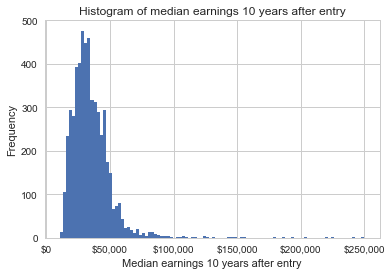

In [122]:
data.hist(column = 'MD_EARN_WNE_P10', bins = 100)
plt.title('Histogram of median earnings 10 years after entry')
plt.xlabel('Median earnings 10 years after entry')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

We note the average "Median earnings 10 years after entry" for our university data is $34,988.01.  The data has a high right skew. The majority of the data resides between 10,000 - 50,000, however it extends far to the right hand side of the histogram.

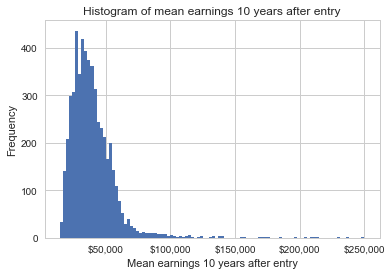

In [123]:
##quick check on Mean earnings - almost the same as median
data.hist(column = 'MN_EARN_WNE_P10', bins = 100)
plt.title('Histogram of mean earnings 10 years after entry')
plt.xlabel('Mean earnings 10 years after entry')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

Next, let's investigate the mean earnings 10 years after entry.

In [11]:
data['MN_EARN_WNE_P10'].describe()

count      5338.000000
mean      39452.191832
std       17835.600815
min       14600.000000
25%       28200.000000
50%       36300.000000
75%       46300.000000
max      250000.000000
Name: MN_EARN_WNE_P10, dtype: float64

Text(0,0.5,'Frequency')

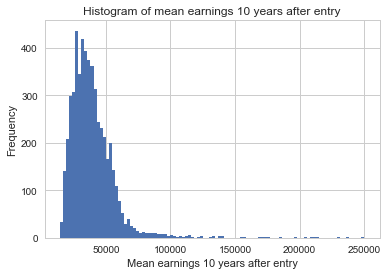

In [126]:
data.hist(column = 'MN_EARN_WNE_P10', bins = 100)
plt.title('Histogram of mean earnings 10 years after entry')
plt.xlabel('Mean earnings 10 years after entry')
plt.ylabel('Frequency')

We note that, as expected, the histogram of the Mean earnings 10 years after entry takes on a very similar shape as the median earnings 10 years after entry.  It is highly right skewed, as the majority of the data resides between approximately 10,000 - 50,000, and extends out to a maximum amount of 250,0000. 

Now, we investigate the frequency of employment by creating a new variable. We note that the "Count_NWNE_P10" variable represents the number of students not working and not enrolled 10 years after entry.  In addition, we note that the "COUNT_WNE_P10" variables represents the number of students working and not enrolled 10 years after entry.  We can use these 2 variables to calculate a proportion of each university's students working 10 years after entry.

In [127]:
data["COUNT_WNE_P10"] = data['COUNT_WNE_P10'].replace("PrivacySuppressed",np.nan)
data["COUNT_NWNE_P10"] = data['COUNT_NWNE_P10'].replace("PrivacySuppressed",np.nan)

In [128]:
data["Employment_Freq"] = (data["COUNT_WNE_P10"].astype(float)/(data["COUNT_WNE_P10"].astype(float)+data["COUNT_NWNE_P10"].astype(float)))

In [129]:
data["Employment_Freq"].describe()

count    4813.000000
mean        0.824890
std         0.073487
min         0.082832
25%         0.782220
50%         0.830369
75%         0.881690
max         0.961019
Name: Employment_Freq, dtype: float64

Text(0,0.5,'Frequency')

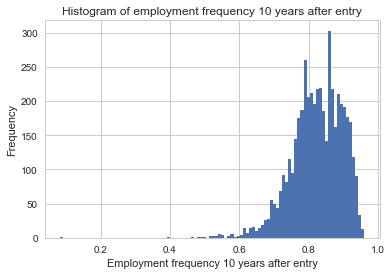

In [130]:
data.hist(column = 'Employment_Freq', bins = 100)
plt.title('Histogram of employment frequency 10 years after entry')
plt.xlabel('Employment frequency 10 years after entry')
plt.ylabel('Frequency')

We note that this data series takes on a negative skew.  The data extends far to the left, however, the majority of the data resides between 0.7 and 0.9.  We also note a mean employment rate of approximately 0.825, and a median employment rate of 0.83.  The Median is greater than the mean, which explains the negative skew.

Let's look at the quartiles of Success on Race

# Debt - Exploratory Analysis

Next, let's take a look at Debt. We note that this series contains "Privacy Suppressed" values, so we convert these to the NumPy "NaN"

In [131]:
data["GRAD_DEBT_MDN_SUPP"].describe()

count                  7156
unique                 1975
top       PrivacySuppressed
freq                   1539
Name: GRAD_DEBT_MDN_SUPP, dtype: object

In [132]:
data['GRAD_DEBT_MDN_SUPP'] = data['GRAD_DEBT_MDN_SUPP'].replace('PrivacySuppressed', np.nan)
data['GRAD_DEBT_MDN_SUPP'] = data['GRAD_DEBT_MDN_SUPP'].astype(float)
data['GRAD_DEBT_MDN_SUPP'].describe()

count     5617.000000
mean     16421.844312
std       8320.774590
min       1500.000000
25%       9500.000000
50%      14119.000000
75%      23611.000000
max      52000.000000
Name: GRAD_DEBT_MDN_SUPP, dtype: float64

In [133]:
display(data["MD_EARN_WNE_P10"].corr(data['GRAD_DEBT_MDN_SUPP']))
display(data["Employment_Freq"].corr(data['GRAD_DEBT_MDN_SUPP']))

0.4144348162644242

0.5411810327589076

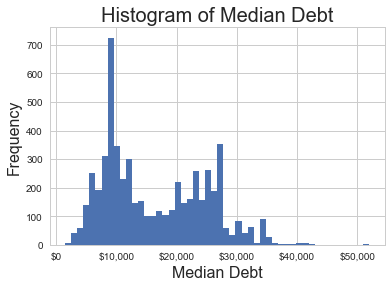

In [134]:
data['GRAD_DEBT_MDN_SUPP'].hist(bins = 50)
plt.xlabel('Median Debt', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Median Debt', fontsize=20)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# SAT Scores - Exploratory Analysis 

## *This section was removed from our paper due to length & integration with our overall story*
Next, let's take a look at SAT scores. We note that this series contains "Privacy Suppressed" values, so we convert these to the NumPy "NaN"

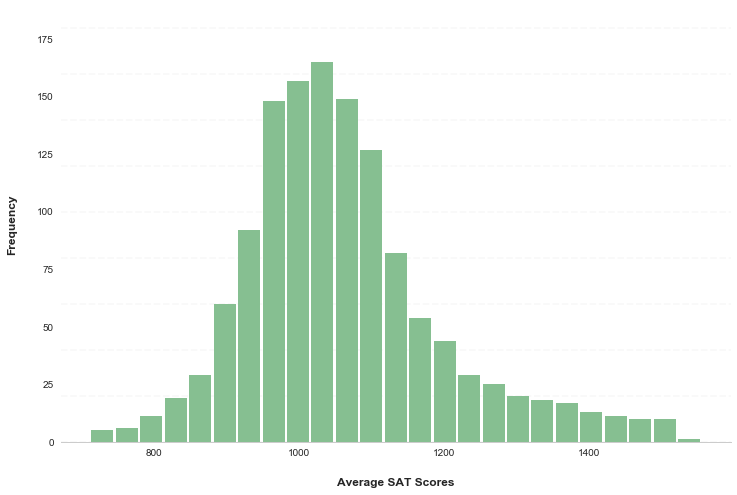

In [135]:
ax = data.hist(column='SAT_AVG', bins=25, histtype='bar', stacked=True, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despinr
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Average SAT Scores", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)


In [136]:
display(data["MN_EARN_WNE_P10"].corr(data['SAT_AVG']))
display(data["MD_EARN_WNE_P10"].corr(data['SAT_AVG']))
display(data["Employment_Freq"].corr(data['SAT_AVG']))

0.7357720268860303

0.666000663167136

0.23278581220366554

We note very high correlations between average SAT scores and the mean and median of graduate earnings 10 years after entry.  The employment rate is slightly lower. 

We then demonstrate the relationship between SAT scores and the 'Student Success' variables via scatterplot visualizations below.

Text(0,0.5,'Mean Earnings 10 years after entry')

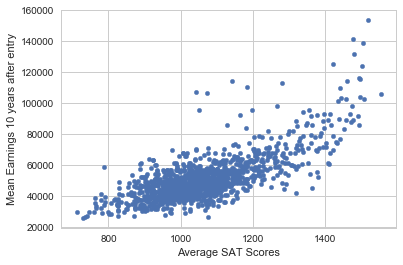

In [137]:
data.plot.scatter(x = 'SAT_AVG', y = "MN_EARN_WNE_P10")
plt.xlabel('Average SAT Scores')
plt.ylabel('Mean Earnings 10 years after entry')

Text(0,0.5,'Median Earnings 10 years after entry')

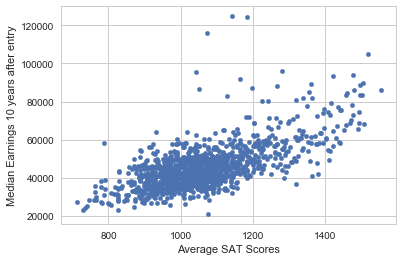

In [138]:
data.plot.scatter(x = 'SAT_AVG', y = "MD_EARN_WNE_P10")
plt.xlabel('Average SAT Scores')
plt.ylabel('Median Earnings 10 years after entry')

Text(0,0.5,'Employment Frequency')

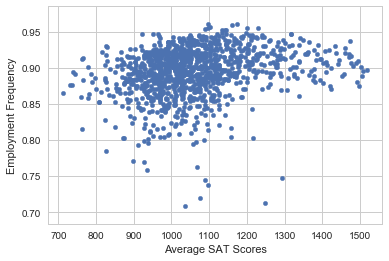

In [139]:
data.plot.scatter(x = 'SAT_AVG', y = "Employment_Freq")
plt.xlabel('Average SAT Scores')
plt.ylabel('Employment Frequency')

I'm curious in looking at the difference between impact of Math & Critical Reading SAT Scores

In [140]:
##MATH SAT Scores
display(data["MN_EARN_WNE_P10"].corr(data['SATMTMID']))
display(data["MD_EARN_WNE_P10"].corr(data['SATMTMID']))
display(data["Employment_Freq"].corr(data['SATMTMID']))

##Critical Reading Scores
display(data["MN_EARN_WNE_P10"].corr(data['SATVRMID']))
display(data["MD_EARN_WNE_P10"].corr(data['SATVRMID']))
display(data["Employment_Freq"].corr(data['SATVRMID']))

0.7540793620916112

0.693834632916582

0.24409588540761734

0.6943650402277111

0.619550361201795

0.15258752071601525

Looks like Math scores are a little more highly corrlated with success rates than Critical Reading

In [141]:
data['SAT_AVG'].describe()

count    1302.000000
mean     1060.230415
std       136.767567
min       712.000000
25%       970.000000
50%      1040.000000
75%      1119.750000
max      1555.000000
Name: SAT_AVG, dtype: float64

Let's look at the differences between the top quartiles and the rest of the SAT averages and see if we can find anything interesting

In [142]:
display('Mean of mean earnings of upper quartile:',data[data['SAT_AVG']>1100]['MN_EARN_WNE_P10'].mean())
display('Mean of median earnings of upper quartile:',data[data['SAT_AVG']>1100]['MD_EARN_WNE_P10'].mean())
display('Mean of employment frequency of upper quartile:',data[data['SAT_AVG']>1100]['Employment_Freq'].mean())

'Mean of mean earnings of upper quartile:'

62996.632124352334

'Mean of median earnings of upper quartile:'

54268.13471502591

'Mean of employment frequency of upper quartile:'

0.9052604749001647

In [143]:
display('Mean of mean earnings of lower quartile:',data[data['SAT_AVG']<1100]['MN_EARN_WNE_P10'].mean())
display('Mean of median earnings of lower quartile:',data[data['SAT_AVG']<1100]['MD_EARN_WNE_P10'].mean())
display('Mean of employment frequency of lower quartile:',data[data['SAT_AVG']<1100]['Employment_Freq'].mean())

'Mean of mean earnings of lower quartile:'

45676.29796839729

'Mean of median earnings of lower quartile:'

41224.15349887133

'Mean of employment frequency of lower quartile:'

0.8898848058178157

In [144]:
data['SATMTMID'].describe()

count    1229.000000
mean      528.028478
std        73.593113
min       355.000000
25%       480.000000
50%       515.000000
75%       560.000000
max       785.000000
Name: SATMTMID, dtype: float64

In [145]:

display('Mean of mean earnings of upper quartile:',data[data['SATMTMID']>550]['MN_EARN_WNE_P10'].mean())
display('Mean of median earnings of upper quartile:',data[data['SATMTMID']>550]['MD_EARN_WNE_P10'].mean())
display('Mean of employment frequency of upper quartile:',data[data['SATMTMID']>550]['Employment_Freq'].mean())
##these are slightly higher than the average of sat scores

'Mean of mean earnings of upper quartile:'

64675.218658892125

'Mean of median earnings of upper quartile:'

55572.01166180758

'Mean of employment frequency of upper quartile:'

0.9066050815224181

In [146]:
display('Mean of mean earnings of upper quartile:',data[data['SATMTMID']<550]['MN_EARN_WNE_P10'].mean())
display('Mean of median earnings of upper quartile:',data[data['SATMTMID']<550]['MD_EARN_WNE_P10'].mean())
display('Mean of employment frequency of upper quartile:',data[data['SATMTMID']<550]['Employment_Freq'].mean())
##these are slightly higher than the average of sat scores

'Mean of mean earnings of upper quartile:'

45804.65949820788

'Mean of median earnings of upper quartile:'

41275.50776583035

'Mean of employment frequency of upper quartile:'

0.8896841142194284

### SAT & Race breakout

In [147]:
##first look at upper quartile
data[data['SAT_AVG']>1100][['UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN']].describe()

##very predominately white...

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN
count,394.000000,394.000000,394.000000,394.000000
mean,0.629079,0.060732,0.095079,0.078107
std,0.169484,0.061235,0.071623,0.075867
min,0.013200,0.000000,0.000000,0.000000
25%,0.521000,0.030775,0.047925,0.025400
50%,0.668500,0.048700,0.076400,0.048650
75%,0.753925,0.071625,0.115525,0.108375
max,0.951100,0.898300,0.667400,0.427000


In [148]:
##next lookat mid quartile
data[(data['SAT_AVG']<1100) & (data['SAT_AVG']>970)][['UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN']].describe()
##higher percentages of blacks & hispanics....lower percentages of asians

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN
count,579.000000,579.000000,579.000000,579.000000
mean,0.644562,0.108539,0.100779,0.033506
std,0.182733,0.116977,0.116866,0.048731
min,0.000000,0.000000,0.000000,0.000000
25%,0.562200,0.045400,0.035050,0.010300
50%,0.681800,0.078400,0.062400,0.017500
75%,0.775450,0.130600,0.122900,0.035400
max,0.984900,0.965100,1.000000,0.401700


In [149]:
##next look at bottom quartile
data[data['SAT_AVG']<970][['UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN']].describe()
##very high percentages of blacks

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN
count,306.000000,306.000000,306.000000,306.000000
mean,0.458802,0.276388,0.127102,0.020260
std,0.273838,0.273715,0.166273,0.030095
min,0.000000,0.000000,0.000000,0.000000
25%,0.211250,0.079650,0.027575,0.004775
50%,0.505100,0.168850,0.061950,0.010550
75%,0.682700,0.343800,0.140825,0.021700
max,0.976200,0.987500,0.948700,0.230000


### Degree Relationships

In [150]:
sat_deg_sort1 = data[data['SAT_AVG']>=1100].iloc[:,46:84]
sat_deg_sort2 = data[data['SAT_AVG']<1100].iloc[:,46:84]

In [151]:
display(sat_deg_sort1.mean().sort_values(ascending = False).head())
display(sat_deg_sort1.mean().sort_values(ascending = True).head())

PCIP52    0.150448
PCIP45    0.096365
PCIP14    0.088968
PCIP26    0.082301
PCIP51    0.079546
dtype: float64

PCIP25    0.000000
PCIP47    0.000001
PCIP29    0.000012
PCIP12    0.000027
PCIP46    0.000037
dtype: float64

We note the top 5 degrees are: 1) Business, 2) Social Sciences, 3) Engineering, 4) Biological / Biomedical Sciences, and 5) Health Professions

The bottom 5 degrees are: 1) Library Sciences, 2) Mechanic and Repaiurs, 3) Military Technologies, 4) Culinary, and 5) Construction Trades

In [152]:
display(sat_deg_sort2.mean().sort_values(ascending = False).head())
display(sat_deg_sort2.mean().sort_values(ascending = True).head())

PCIP52    0.185064
PCIP51    0.150723
PCIP13    0.065340
PCIP42    0.065231
PCIP24    0.053924
dtype: float64

PCIP25    0.000031
PCIP29    0.000097
PCIP41    0.000194
PCIP48    0.000245
PCIP46    0.000254
dtype: float64

Top 5 degrees are: 1) Business, 2) Health Professions, 3) Education, 4) Psychology, 5) Liberal Arts

# Degree Distribution - Exploratory Analysis

We calculate the average % of degrees distributed and sorted from most to least frequent.

In [153]:


display(data.iloc[:,46:84].mean().sort_values(ascending = False).head())
display(data.iloc[:,46:84].mean().sort_values(ascending = True).head())

PCIP51    0.267946
PCIP12    0.207191
PCIP52    0.093626
PCIP24    0.060014
PCIP50    0.034366
dtype: float64

PCIP25    0.000039
PCIP29    0.000132
PCIP41    0.000765
PCIP04    0.001338
PCIP05    0.001356
dtype: float64

Top 5: Health Professions, Personal and Culinary Services, Business, Liberal Arts and Sciences, Visual and Performing Arts

The results are a bit odd considering we have 2 professional degrees in the top 2 slots. This must be because the schools in which offer these are likely to have very nice % of distribution, since they are specialized degrees. We will need to take this into account later in our analysis.

In [154]:
data[data['PCIP12'] == 1]['UNITID'].count()

1146

As we suspected, we note that there are over 1,000 universities in our data frame that only offer “Personal and Culinary Services” degrees (i.e. the percentage awarded is equal to 1), such as cosmetology, and that do not offer any engineering, business, or math and science degrees.  Thus, our mean calculation is highly skewed for degree distribution.

# RACE - Exploratory Analysis

We begin by investigating our race variable descriptive statistics and corresponding histograms.

(array([713., 394., 435., 400., 372., 339., 283., 272., 214., 207., 171.,
        160., 136., 103., 109.,  78., 104.,  77.,  74.,  72.,  77.,  61.,
         63.,  56.,  53.,  54.,  59.,  36.,  55.,  56.,  40.,  42.,  41.,
         39.,  31.,  29.,  43.,  37.,  31.,  23.,  26.,  29.,  22.,  17.,
         16.,  20.,  24.,  18.,  21.,  15.,  25.,  21.,  18.,  12.,  16.,
          9.,  12.,  17.,  18.,  13.,  12.,  13.,  13.,  17.,   7.,  12.,
         10.,  10.,  14.,  11.,   3.,   4.,   5.,   8.,  10.,   6.,   6.,
          6.,   5.,   3.,   7.,   4.,   1.,   6.,   2.,   4.,   5.,   3.,
          7.,   3.,   7.,   4.,   4.,   6.,  10.,   5.,   7.,  17.,   8.,
        154.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

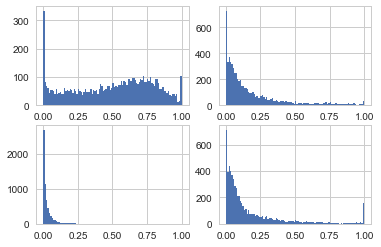

In [155]:
fig, ax = plt.subplots(2,2)
ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]
ax1.hist(data['UGDS_WHITE'][~np.isnan(data['UGDS_WHITE'])],bins = 100)
ax1.set_xlabel('Percent White')
ax2.hist(data['UGDS_BLACK'][~np.isnan(data['UGDS_BLACK'])],bins = 100)
ax3.hist(data['UGDS_ASIAN'][~np.isnan(data['UGDS_ASIAN'])],bins = 100)
ax4.hist(data['UGDS_HISP'][~np.isnan(data['UGDS_HISP'])],bins = 100)

In [156]:
data[['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_ASIAN', 'UGDS_HISP']].describe()

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,6447.000000,6447.000000,6447.000000,6447.000000
mean,0.500712,0.183246,0.036867,0.172926
std,0.286228,0.219627,0.079043,0.227593
min,0.000000,0.000000,0.000000,0.000000
25%,0.257350,0.035500,0.002600,0.031650
50%,0.544800,0.098300,0.013800,0.080300
75%,0.734700,0.245100,0.036600,0.217050
max,1.000000,1.000000,1.000000,1.000000


Percent Asian has the largest right skew, which is little bit surprising. It also has the lowest mean of the 4 races at 0.036867, and a median of 0.0138. Range of all race variables is from 0.0 - 1.0. Since we are dealing with proportions, this is expected. 

# Exploratory Analysis -- 
The following variable analysis can be found in their perspective Questions as described below: 

University Expenses (see Q3 analysis)
Faculty (see Q4 analysis)
Graduation Percentages (see Q4 analysis)
Geographic  (see Q5 analysis)

# Q1:  Race Demographics vs. Post Grad Success & Degree distribution
### How does racial demographics impact student success post graduation and the distribution of degrees within universities?

In [157]:
data[['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP','MD_EARN_WNE_P10',"MN_EARN_WNE_P10",'Employment_Freq']].corr()

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP,MD_EARN_WNE_P10,MN_EARN_WNE_P10,Employment_Freq
UGDS_WHITE,1.000000,-0.487208,-0.225557,-0.565485,0.192961,0.167531,0.314820
UGDS_BLACK,-0.487208,1.000000,-0.126757,-0.208349,-0.215249,-0.220855,-0.071176
UGDS_ASIAN,-0.225557,-0.126757,1.000000,0.013849,0.246546,0.272135,0.058625
UGDS_HISP,-0.565485,-0.208349,0.013849,1.000000,-0.199743,-0.178711,-0.352263
MD_EARN_WNE_P10,0.192961,-0.215249,0.246546,-0.199743,1.000000,0.981875,0.734573
MN_EARN_WNE_P10,0.167531,-0.220855,0.272135,-0.178711,0.981875,1.000000,0.687504
Employment_Freq,0.314820,-0.071176,0.058625,-0.352263,0.734573,0.687504,1.000000


Interesting to note that Pct Black and Pct Hispanics have a negative relationship with the "Student Success" variables.  I.e. as they increase, the student success decrease, very interesting.  Pct White & Pct Asian have positive relationships. This may be something we can demonstrate in 4 part graphic to show the different trends race has on student success!

We don't really see any very HIGH correlation between the race variables and our "student success" factors, however the trends are definitely interesting.  Maybe another interesting thing to point out is the pct black and pct hispanic are pretty highly negatively correlated with pct white. 

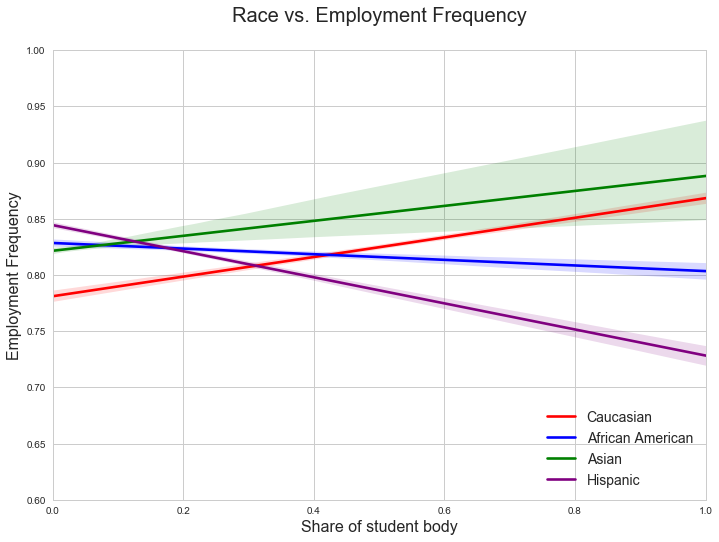

In [158]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('UGDS_WHITE', 'Employment_Freq', data, scatter_kws={'color': 'r', 'alpha': 0.00}, line_kws={'color': 'r'})
sns.regplot('UGDS_BLACK', 'Employment_Freq', data, scatter_kws={'color': 'b', 'alpha': 0.00}, line_kws={'color': 'b'})
sns.regplot('UGDS_ASIAN', 'Employment_Freq', data, scatter_kws={'color': 'g', 'alpha': 0.00}, line_kws={'color': 'g'})
sns.regplot('UGDS_HISP', 'Employment_Freq', data, scatter_kws={'color': 'purple', 'alpha': 0.00}, line_kws={'color': 'purple'})

plt.xlabel('Share of student body', fontsize=16)
plt.ylabel('Employment Frequency', fontsize=16)
plt.title('Race vs. Employment Frequency', fontsize=20).set_position([.5, 1.05])
plt.legend(['Caucasian', 'African American', 'Asian', 'Hispanic'], fontsize=14)

plt.xlim(0, 1)
plt.ylim(0.6, 1)
pass

It is interesting to note that the employment rate 10 years after entry decreases the percent of the university's African American and Hispanic study body increases. Could this suggest there is some bias in hiring processes, favoring universities with more Whites & Asians?

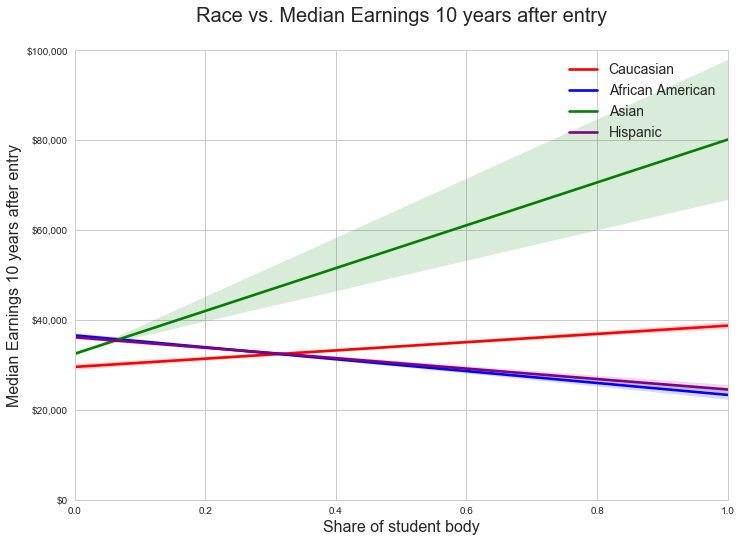

In [159]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('UGDS_WHITE', 'MD_EARN_WNE_P10', data, scatter_kws={'color': 'r', 'alpha': 0.00}, line_kws={'color': 'r'})
sns.regplot('UGDS_BLACK', 'MD_EARN_WNE_P10', data, scatter_kws={'color': 'b', 'alpha': 0.00}, line_kws={'color': 'b'})
sns.regplot('UGDS_ASIAN', 'MD_EARN_WNE_P10', data, scatter_kws={'color': 'g', 'alpha': 0.00}, line_kws={'color': 'g'})
sns.regplot('UGDS_HISP', 'MD_EARN_WNE_P10', data, scatter_kws={'color': 'purple', 'alpha': 0.00}, line_kws={'color': 'purple'})

plt.xlabel('Share of student body', fontsize=16)
plt.ylabel('Median Earnings 10 years after entry', fontsize=16)
plt.title('Race vs. Median Earnings 10 years after entry', fontsize=20).set_position([.5, 1.05])
plt.legend(['Caucasian', 'African American', 'Asian', 'Hispanic'], fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.xlim(0, 1)
plt.ylim(0, 100000)
pass

We note a stronger positive relationship between percent Asian and median earnings 10 years after graduation.  Similar to the graph representing relationships with Employment frequency, 

In [160]:
data[['UGDS_WHITE', 'UGDS_BLACK','UGDS_ASIAN', 'UGDS_HISP']].describe()

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,6447.000000,6447.000000,6447.000000,6447.000000
mean,0.500712,0.183246,0.036867,0.172926
std,0.286228,0.219627,0.079043,0.227593
min,0.000000,0.000000,0.000000,0.000000
25%,0.257350,0.035500,0.002600,0.031650
50%,0.544800,0.098300,0.013800,0.080300
75%,0.734700,0.245100,0.036600,0.217050
max,1.000000,1.000000,1.000000,1.000000


In [161]:
display('Mean of median earnings of top quartile % white:',data[data['UGDS_WHITE']>0.7347]['MD_EARN_WNE_P10'].mean())
display('Mean of median earnings of top quartile % black:',data[data['UGDS_BLACK']>0.2451]['MD_EARN_WNE_P10'].mean())
display('Mean of median earnings of top quartile % Asian:',data[data['UGDS_ASIAN']>0.0366]['MD_EARN_WNE_P10'].mean())
display('Mean of median earnings of top quartile % Hispanic:',data[data['UGDS_HISP']>0.21705]['MD_EARN_WNE_P10'].mean())

'Mean of median earnings of top quartile % white:'

35119.0681622088

'Mean of median earnings of top quartile % black:'

29153.714285714286

'Mean of median earnings of top quartile % Asian:'

41758.13765182186

'Mean of median earnings of top quartile % Hispanic:'

30398.01324503311

We observe some interesting relationships here. We calculate the average median earnings of the top quartile of universities for each race, and note that on average, the universities in the top quartile of % Asian produces the earnings 10 years after entry, while universities in the top quartile of % black have an average median earnings 10 years after entry about $12,000 lower (which is approximately 30%)! We are curious if this may reveal some racial bias, or if there are other factors, i.e. maybe individuals of certain races are drawn to specific types of hire paying degrees? 

So now we look at Racial impact on degree distribtuion. We elect to perform our analysis around the following 4 key education degrees:

1) Engineering
2) Business
3) Liberal Arts
4) Visual Arts

## Engineering

In [162]:
#Per the exploratory analyis, there are many universities in the dataframe that do not offer engineering degrees. 
#Since we are looking to observe the relationships between race and the engineering degree distribution, we need to
#restrict our analysis to only those universities that offer engineering degrees. Thus, we subset below.
eng_deg = data[data['PCIP14']>0]
no_eng_deg = data[data['PCIP14']==0]

In [163]:
display('Mean of % engineering degrees awarded in top quartile % white:',eng_deg[eng_deg['UGDS_WHITE']>0.7347]['PCIP14'].mean())
display('Mean of % engineering degrees awarded in top quartile % black:',eng_deg[eng_deg['UGDS_BLACK']>0.2451]['PCIP14'].mean())
display('Mean of % engineering degrees awarded in % Asian:',eng_deg[eng_deg['UGDS_ASIAN']>0.0366]['PCIP14'].mean())
display('Mean of % engineering degrees awarded in % Hispanic:',eng_deg[eng_deg['UGDS_HISP']>0.21705]['PCIP14'].mean())

eng_race = pd.Series([eng_deg[eng_deg['UGDS_WHITE']>0.7347]['PCIP14'].mean(), eng_deg[eng_deg['UGDS_BLACK']>0.2451]['PCIP14'].mean(), eng_deg[eng_deg['UGDS_ASIAN']>0.0366]['PCIP14'].mean(), eng_deg[eng_deg['UGDS_HISP']>0.21705]['PCIP14'].mean()])

'Mean of % engineering degrees awarded in top quartile % white:'

0.07375523012552301

'Mean of % engineering degrees awarded in top quartile % black:'

0.03200490196078431

'Mean of % engineering degrees awarded in % Asian:'

0.0870786967418546

'Mean of % engineering degrees awarded in % Hispanic:'

0.03716933333333334

We note the highest % of engineering degrees awarded to be at universities in the top quartile of % Asian, while the lowest is in top quartile of % black.

## Business

In [164]:
##Similar to engineering degrees above, we need to subset our dataframe

In [165]:
bus_deg = data[data['PCIP52']>0]

In [166]:
display('Mean of % business degrees awarded in top quartile % white:',bus_deg[bus_deg['UGDS_WHITE']>0.7347]['PCIP52'].mean())
display('Mean of % business degrees awarded in top quartile % black:',bus_deg[bus_deg['UGDS_BLACK']>0.2451]['PCIP52'].mean())
display('Mean of % business degrees awarded in % Asian:',bus_deg[bus_deg['UGDS_ASIAN']>0.0366]['PCIP52'].mean())
display('Mean of % business degrees awarded in % Hispanic:',bus_deg[bus_deg['UGDS_HISP']>0.21705]['PCIP52'].mean())

bus_race = pd.Series([bus_deg[bus_deg['UGDS_WHITE']>0.7347]['PCIP52'].mean(), bus_deg[bus_deg['UGDS_BLACK']>0.2451]['PCIP52'].mean(), bus_deg[bus_deg['UGDS_ASIAN']>0.0366]['PCIP52'].mean(), bus_deg[bus_deg['UGDS_HISP']>0.21705]['PCIP52'].mean()])

'Mean of % business degrees awarded in top quartile % white:'

0.15417952261306545

'Mean of % business degrees awarded in top quartile % black:'

0.20114767123287686

'Mean of % business degrees awarded in % Asian:'

0.18296794258373186

'Mean of % business degrees awarded in % Hispanic:'

0.1635553908355795

We note the highest % of business degrees awarded to be at universities in the top quartile of % Black, while the lowerst is in the top quartile of % white.

## Liberal Arts

In [167]:
#subset dataframe to only include universities with liberal arts degrees

In [168]:
lib_art = data[data['PCIP24']>0]

In [169]:
display('Mean of % liberal arts degrees awarded in top quartile % white:',lib_art[lib_art['UGDS_WHITE']>0.7347]['PCIP24'].mean())
display('Mean of % liberal arts degrees awarded in top quartile % black:',lib_art[lib_art['UGDS_BLACK']>0.2451]['PCIP24'].mean())
display('Mean of % liberal arts degrees awarded in % Asian:',lib_art[lib_art['UGDS_ASIAN']>0.0366]['PCIP24'].mean())
display('Mean of % liberal arts degrees awarded in % Hispanic:',lib_art[lib_art['UGDS_HISP']>0.21705]['PCIP24'].mean())

lib_race = pd.Series([lib_art[lib_art['UGDS_WHITE']>0.7347]['PCIP24'].mean(), lib_art[lib_art['UGDS_BLACK']>0.2451]['PCIP24'].mean(), lib_art[lib_art['UGDS_ASIAN']>0.0366]['PCIP24'].mean(), lib_art[lib_art['UGDS_HISP']>0.21705]['PCIP24'].mean()])

'Mean of % liberal arts degrees awarded in top quartile % white:'

0.17635503875968994

'Mean of % liberal arts degrees awarded in top quartile % black:'

0.21523801916932914

'Mean of % liberal arts degrees awarded in % Asian:'

0.175886274509804

'Mean of % liberal arts degrees awarded in % Hispanic:'

0.23242351543943027

Definitely higher for universities with higher percentages of blacks & Hispanics than for whites and Asians.

## Visual Arts

In [170]:
#finally, subset dataframe to only include universities with visual arts

In [171]:
vis_art = data[data['PCIP50']>0]

In [172]:
display('Mean of % visual arts degrees awarded in top quartile % white:',vis_art[vis_art['UGDS_WHITE']>0.7347]['PCIP50'].mean())
display('Mean of % visual arts degrees awarded in top quartile % black:',vis_art[vis_art['UGDS_BLACK']>0.2451]['PCIP50'].mean())
display('Mean of % visual arts degrees awarded in % Asian:',vis_art[vis_art['UGDS_ASIAN']>0.0366]['PCIP50'].mean())
display('Mean of % visual arts degrees awarded in % Hispanic:',vis_art[vis_art['UGDS_HISP']>0.21705]['PCIP50'].mean())

vis_race = pd.Series([vis_art[vis_art['UGDS_WHITE']>0.7347]['PCIP50'].mean(), vis_art[vis_art['UGDS_BLACK']>0.2451]['PCIP50'].mean(), vis_art[vis_art['UGDS_ASIAN']>0.0366]['PCIP50'].mean(), vis_art[vis_art['UGDS_HISP']>0.21705]['PCIP50'].mean()])

'Mean of % visual arts degrees awarded in top quartile % white:'

0.0694640831758034

'Mean of % visual arts degrees awarded in top quartile % black:'

0.097224924012158

'Mean of % visual arts degrees awarded in % Asian:'

0.12302754820936641

'Mean of % visual arts degrees awarded in % Hispanic:'

0.08486803455723539

In [173]:
top_quartile = pd.Series(["Caucasian","African_American","Asian","Hispanic"])
dr = {'Top_Quartile':top_quartile, 'Engineering_deg':eng_race, 'Business_deg':bus_race, 'LiberalArts_deg':lib_race, 'VisualArt_deg':vis_race}
deg_race = pd.DataFrame(dr).set_index("Top_Quartile")
deg_race

,Engineering_deg,Business_deg,LiberalArts_deg,VisualArt_deg
Top_Quartile,,,,
Caucasian,0.073755,0.154180,0.176355,0.069464
African_American,0.032005,0.201148,0.215238,0.097225
Asian,0.087079,0.182968,0.175886,0.123028
Hispanic,0.037169,0.163555,0.232424,0.084868


Text(0.5,1,'Bar Graph of Percent of Degrees Awarded per Universities in each of the top Racial Quartiles')

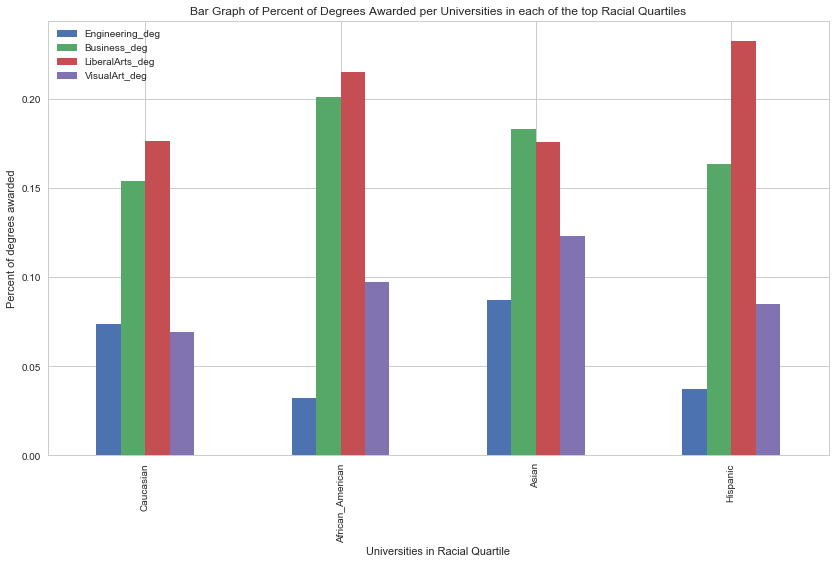

In [174]:
deg_race[['Engineering_deg','Business_deg','LiberalArts_deg','VisualArt_deg']].plot.bar(figsize=(14,8))
plt.xlabel('Universities in Racial Quartile')
plt.ylabel('Percent of degrees awarded')
plt.title('Bar Graph of Percent of Degrees Awarded per Universities in each of the top Racial Quartiles')

# Q2:  How does your degree choice affect your post graduate success?

We will perform our analysis over the same 4 degrees mentioned in Q1. In order to assess the relationship between these degrees and student success, we run regressions of our student success varaibles against the percentage of each degree awarded.

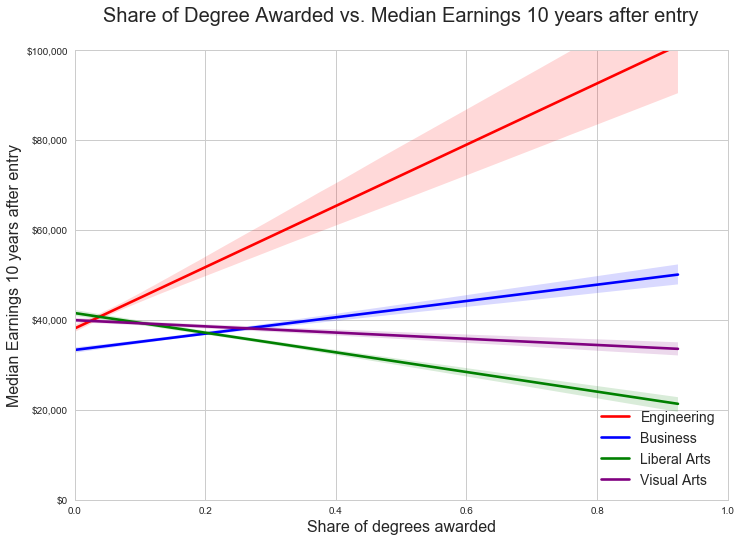

In [175]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('PCIP14', 'MD_EARN_WNE_P10', eng_deg, scatter_kws={'color': 'r', 'alpha': 0.00}, line_kws={'color': 'r'})
sns.regplot('PCIP52', 'MD_EARN_WNE_P10', bus_deg, scatter_kws={'color': 'b', 'alpha': 0.00}, line_kws={'color': 'b'})
sns.regplot('PCIP24', 'MD_EARN_WNE_P10', lib_art, scatter_kws={'color': 'g', 'alpha': 0.00}, line_kws={'color': 'g'})
sns.regplot('PCIP50', 'MD_EARN_WNE_P10', vis_art, scatter_kws={'color': 'purple', 'alpha': 0.00}, line_kws={'color': 'purple'})

plt.xlabel('Share of degrees awarded', fontsize=16)
plt.ylabel('Median Earnings 10 years after entry', fontsize=16)
plt.title('Share of Degree Awarded vs. Median Earnings 10 years after entry', fontsize=20).set_position([.5, 1.05])
plt.legend(['Engineering', 'Business', 'Liberal Arts', 'Visual Arts'], fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.xlim(0, 1)
plt.ylim(0, 100000)
pass

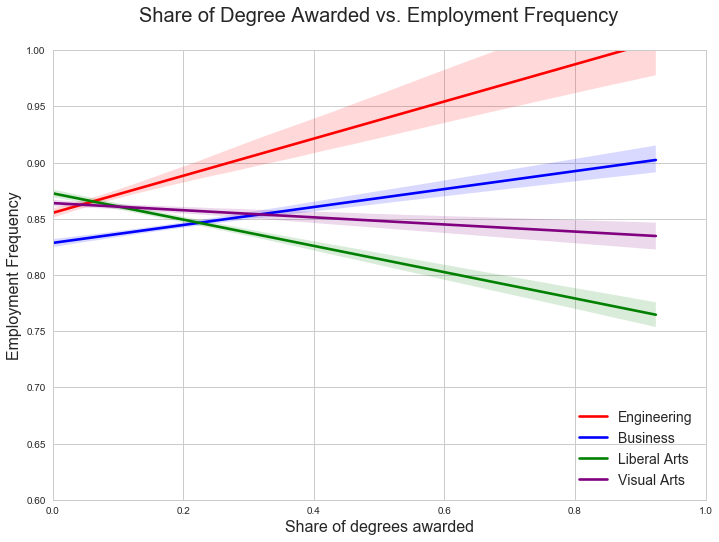

In [176]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('PCIP14', 'Employment_Freq', eng_deg, scatter_kws={'color': 'r', 'alpha': 0.00}, line_kws={'color': 'r'})
sns.regplot('PCIP52', 'Employment_Freq', bus_deg, scatter_kws={'color': 'b', 'alpha': 0.00}, line_kws={'color': 'b'})
sns.regplot('PCIP24', 'Employment_Freq', lib_art, scatter_kws={'color': 'g', 'alpha': 0.00}, line_kws={'color': 'g'})
sns.regplot('PCIP50', 'Employment_Freq', vis_art, scatter_kws={'color': 'purple', 'alpha': 0.00}, line_kws={'color': 'purple'})

plt.xlabel('Share of degrees awarded', fontsize=16)
plt.ylabel('Employment Frequency', fontsize=16)
plt.title('Share of Degree Awarded vs. Employment Frequency', fontsize=20).set_position([.5, 1.05])
plt.legend(['Engineering', 'Business', 'Liberal Arts', 'Visual Arts'], fontsize=14)

plt.xlim(0, 1)
plt.ylim(0.6, 1)
pass

In [177]:
display(eng_deg['PCIP14'].describe())
display(bus_deg['PCIP52'].describe())
display(lib_art['PCIP24'].describe())
display(vis_art['PCIP50'].describe())

count    942.000000
mean       0.066008
std        0.123256
min        0.000200
25%        0.006400
50%        0.019200
75%        0.074875
max        1.000000
Name: PCIP14, dtype: float64

count    3378.000000
mean        0.178632
std         0.154525
min         0.000500
25%         0.082800
50%         0.141950
75%         0.218500
max         1.000000
Name: PCIP52, dtype: float64

count    2028.000000
mean        0.190726
std         0.206022
min         0.000100
25%         0.028125
50%         0.115350
75%         0.301700
max         1.000000
Name: PCIP24, dtype: float64

count    2221.000000
mean        0.099725
std         0.212189
min         0.000300
25%         0.015800
50%         0.031500
75%         0.061200
max         1.000000
Name: PCIP50, dtype: float64

In [178]:
##Let's look at the earnings details in the top and bottom quartiles of the degrees
deg_earn_top = pd.Series([eng_deg[eng_deg['PCIP14']>0.074875]['MD_EARN_WNE_P10'].mean(), bus_deg[bus_deg['PCIP52']>0.2185]['MD_EARN_WNE_P10'].mean(), lib_art[lib_art['PCIP24']>0.3017]['MD_EARN_WNE_P10'].mean(), vis_art[vis_art['PCIP50']>0.0612]['MD_EARN_WNE_P10'].mean()])
deg_earn_bot = pd.Series([eng_deg[eng_deg['PCIP14']<0.00650]['MD_EARN_WNE_P10'].mean(), bus_deg[bus_deg['PCIP52']<0.082800]['MD_EARN_WNE_P10'].mean(), lib_art[lib_art['PCIP24']<0.028125]['MD_EARN_WNE_P10'].mean(), vis_art[vis_art['PCIP50']<0.015800]['MD_EARN_WNE_P10'].mean()])
deg_freq_top = pd.Series([eng_deg[eng_deg['PCIP14']>0.074875]['Employment_Freq'].mean(), bus_deg[bus_deg['PCIP52']>0.2185]['Employment_Freq'].mean(), lib_art[lib_art['PCIP24']>0.3017]['Employment_Freq'].mean(), vis_art[vis_art['PCIP50']>0.0612]['Employment_Freq'].mean()])
deg_freq_bot = pd.Series([eng_deg[eng_deg['PCIP14']<0.00650]['Employment_Freq'].mean(), bus_deg[bus_deg['PCIP52']<0.082800]['Employment_Freq'].mean(), lib_art[lib_art['PCIP24']<0.028125]['Employment_Freq'].mean(), vis_art[vis_art['PCIP50']<0.015800]['Employment_Freq'].mean()])
degs = pd.Series(["Engineering", "Business", "Liberal_Arts", "Visual_Arts"])

degs_col = {"Top_Quart_Earn":deg_earn_top, "Bot_Quart_Earn":deg_earn_bot, "Top_Quart_Freq": deg_freq_top, "Bot_Quart_Freq":deg_freq_bot, "Degrees":degs}
deg_earn = pd.DataFrame(degs_col).set_index("Degrees")
deg_earn

,Top_Quart_Earn,Bot_Quart_Earn,Top_Quart_Freq,Bot_Quart_Freq
Degrees,,,,
Engineering,55440.969163,35632.627119,0.903949,0.836621
Business,40387.532134,32191.116751,0.861385,0.812249
Liberal_Arts,31946.428571,46352.409639,0.821082,0.893165
Visual_Arts,39190.588235,36651.291513,0.865529,0.844012


In [179]:
deg_earn["Earnings_pctdiff"] = (deg_earn["Top_Quart_Earn"] - deg_earn["Bot_Quart_Earn"]) / deg_earn["Bot_Quart_Earn"]
deg_earn["Frequency_pctdiff"] = (deg_earn["Top_Quart_Freq"] - deg_earn["Bot_Quart_Freq"]) / deg_earn["Bot_Quart_Freq"]
deg_earn

,Top_Quart_Earn,Bot_Quart_Earn,Top_Quart_Freq,Bot_Quart_Freq,Earnings_pctdiff,Frequency_pctdiff
Degrees,,,,,,
Engineering,55440.969163,35632.627119,0.903949,0.836621,0.555905,0.080475
Business,40387.532134,32191.116751,0.861385,0.812249,0.254617,0.060495
Liberal_Arts,31946.428571,46352.409639,0.821082,0.893165,-0.310792,-0.080706
Visual_Arts,39190.588235,36651.291513,0.865529,0.844012,0.069283,0.025495


In [180]:
deg_earn["Earnings_pctdiff"] = (deg_earn["Top_Quart_Earn"] - deg_earn["Bot_Quart_Earn"]) / deg_earn["Bot_Quart_Earn"]
deg_earn["Frequency_pctdiff"] = (deg_earn["Top_Quart_Freq"] - deg_earn["Bot_Quart_Freq"]) / deg_earn["Bot_Quart_Freq"]
deg_earn

,Top_Quart_Earn,Bot_Quart_Earn,Top_Quart_Freq,Bot_Quart_Freq,Earnings_pctdiff,Frequency_pctdiff
Degrees,,,,,,
Engineering,55440.969163,35632.627119,0.903949,0.836621,0.555905,0.080475
Business,40387.532134,32191.116751,0.861385,0.812249,0.254617,0.060495
Liberal_Arts,31946.428571,46352.409639,0.821082,0.893165,-0.310792,-0.080706
Visual_Arts,39190.588235,36651.291513,0.865529,0.844012,0.069283,0.025495


### SAT SCORES - We removed this from the report due to story flow & the length of our paper :)

And now SAT scores...

As expected, highest correlation is between SAT Math scores and engineering degree percent - almost 0.444772

In [181]:
eng_deg[['PCIP14','SATMTMID','SATVRMID','SAT_AVG']].corr()

,PCIP14,SATMTMID,SATVRMID,SAT_AVG
PCIP14,1.000000,0.444772,0.338233,0.393023
SATMTMID,0.444772,1.000000,0.947528,0.974938
SATVRMID,0.338233,0.947528,1.000000,0.971271
SAT_AVG,0.393023,0.974938,0.971271,1.000000


In [182]:
eng_deg['PCIP14'].describe()

count    942.000000
mean       0.066008
std        0.123256
min        0.000200
25%        0.006400
50%        0.019200
75%        0.074875
max        1.000000
Name: PCIP14, dtype: float64

In [183]:
##Let's look at the difference in the SAT AVG between the top quartile of engineering degree distribtuion, and bottom...

display(eng_deg[eng_deg['PCIP14']>= 0.074875].loc[:,'SAT_AVG'].mean())
display(eng_deg[eng_deg['PCIP14']< 0.074875].loc[:,'SAT_AVG'].mean())


1184.7666666666667

1073.942238267148

In [184]:
display(eng_deg['SAT_AVG'].mean())
display(no_eng_deg['SAT_AVG'].mean())
#almost a 100 point average here interesting to note...engineers are smart! :)

1121.7310061601643

1023.480981595092

Let's look at Liberal Arts & SAT scores

Negatively related...interesting...seems as if Liberal arts schools attract individuals with lower SAT scores

In [185]:
lib_art[['PCIP24','SATMTMID','SATVRMID','SAT_AVG']].corr()

,PCIP24,SATMTMID,SATVRMID,SAT_AVG
PCIP24,1.000000,-0.152061,-0.108617,-0.149637
SATMTMID,-0.152061,1.000000,0.918535,0.953849
SATVRMID,-0.108617,0.918535,1.000000,0.946491
SAT_AVG,-0.149637,0.953849,0.946491,1.000000


In [186]:
lib_art['PCIP24'].describe()

count    2028.000000
mean        0.190726
std         0.206022
min         0.000100
25%         0.028125
50%         0.115350
75%         0.301700
max         1.000000
Name: PCIP24, dtype: float64

In [187]:
display(lib_art[lib_art['PCIP24']>= 0.11535].loc[:,'SAT_AVG'].mean())
display(lib_art[lib_art['PCIP24']< 0.11535].loc[:,'SAT_AVG'].mean())
#we see a 75 point difference in the SAT scores of universities with libart_degree above/below midpoint

987.4462809917355

1058.4444444444443

Lastly, let's look at business

In [188]:
bus_deg[['PCIP52','SATMTMID','SATVRMID','SAT_AVG']].corr()

,PCIP52,SATMTMID,SATVRMID,SAT_AVG
PCIP52,1.000000,-0.075675,-0.093448,-0.075070
SATMTMID,-0.075675,1.000000,0.919761,0.947988
SATVRMID,-0.093448,0.919761,1.000000,0.943067
SAT_AVG,-0.075070,0.947988,0.943067,1.000000


Not much correlation here either

In [189]:
display("Difference in SAT scores:")
display(bus_deg[bus_deg['PCIP52']>= 0.14195].loc[:,'SAT_AVG'].mean())
display(bus_deg[bus_deg['PCIP52']< 0.14195].loc[:,'SAT_AVG'].mean())

'Difference in SAT scores:'

1045.1511056511056

1055.6723163841807

Interesting to note there is a negative correlation, the average sat scores for schools with above the median business degree distribution have lower average SAT scores 

# State Impact 
## Concepts and observations in this section is leveraged in Q5
How does the location influence student success?

In [190]:
data['STABBR'].describe()

count     7175
unique      59
top         CA
freq       717
Name: STABBR, dtype: object

There are 59 States, so let's check to make sure these are all valid

In [191]:
data['STABBR'].sort_values(ascending = True).unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'FM', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT',
       'WA', 'WI', 'WV', 'WY'], dtype=object)

The following abbreviations are not states but assumed territories or regions important to call out: AS, DC, FM, GU, MH, MP, PR, PW, VI

Let's take a quick look at the counts per state (top and bottom)

In [192]:
display(data.groupby(['STABBR'])['STABBR'].count().sort_values(ascending = False).head(5))
display(data.groupby(['STABBR'])['STABBR'].count().sort_values(ascending = False).tail(5))

STABBR
CA    717
NY    454
TX    454
FL    417
PA    382
Name: STABBR, dtype: int64

STABBR
FM    1
MH    1
AS    1
PW    1
MP    1
Name: STABBR, dtype: int64

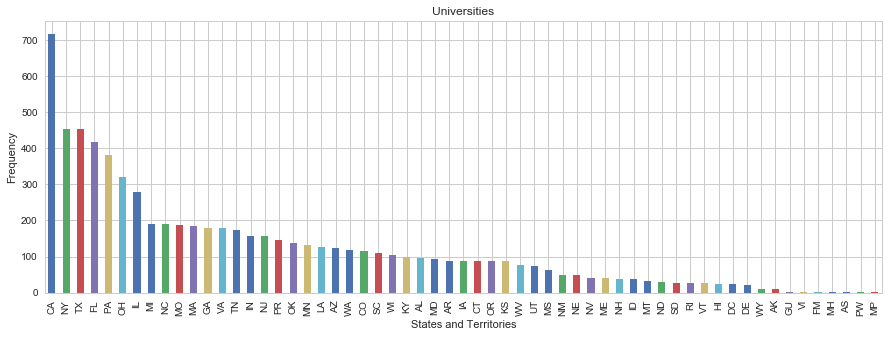

In [193]:
st_group = data.groupby(['STABBR'])['STABBR'].count().sort_values(ascending = False)
ax = st_group.plot.bar(x='STABBR', figsize=(15, 5))
plt.ylabel("Frequency")
plt.xlabel("States and Territories")
plt.title('Universities')
st_group = st_group.rename('STABBR_COUNT')
st_group.head()
plot_usa_choropleth(st_group, 'STABBR_COUNT', 'States and Territories', 'Frequency')

The states and territory data looks good. So let's see how the SAT, Salary, Degree is impacted by Location

Which states have the highest and lowest paying engineering jobs?

In [194]:
display("Top 10 Engineering States\n", eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).head(10))
display("\nBottom 10 Engineering States\n", eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).tail(10))

#eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).head(10).plot.bar(x='STABBR', figsize=(15, 5))
#plt.ylim([45000, 60000])
#eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).head(10).plot.bar(x='STABBR', figsize=(15, 5))
#plt.ylim([19000, 40000])

'Top 10 Engineering States\n'

STABBR
NH    55850.000000
DC    52700.000000
MA    51931.034483
RI    50716.666667
SD    50450.000000
PA    49837.037037
ME    49816.666667
VT    49200.000000
CO    48790.909091
CT    48440.000000
Name: MD_EARN_WNE_P10, dtype: float64

'\nBottom 10 Engineering States\n'

STABBR
ID    36877.777778
MT    36525.000000
NE    36320.000000
NC    35629.629630
AR    35588.888889
OK    35523.529412
WY    34714.285714
NM    32531.250000
MS    30992.307692
PR    19962.500000
Name: MD_EARN_WNE_P10, dtype: float64

Which states have the highest and lowest paying non-engineering jobs?

In [195]:
display("Top 10 States (Non Engineering)\n", no_eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).head(10))
display("\nBottom 10 States (Non Engineering)\n", no_eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).tail(10))

plot_usa_choropleth(no_eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False), 'MD_EARN_WNE_P10', 'Non Engineering Salaries', 'Thousands USD')

'Top 10 States (Non Engineering)\n'

STABBR
DC    46920.000000
MA    41827.619048
RI    39638.461538
CT    38486.046512
NY    38353.191489
MN    37241.333333
PA    37081.196581
NE    36851.282051
MD    36395.918367
AK    35566.666667
Name: MD_EARN_WNE_P10, dtype: float64

'\nBottom 10 States (Non Engineering)\n'

STABBR
MI    27961.363636
GU    26800.000000
MS    26167.647059
ID    23360.000000
AS    22300.000000
MP    20700.000000
FM    19500.000000
PR    18449.523810
MH             NaN
PW             NaN
Name: MD_EARN_WNE_P10, dtype: float64

*** Need to verify the above **

Top 10 Engineering states by salary surprises:
--> has South Dakota and Colorado, missing New York and California.

Bottom 10 Engineering by states by salary is as expected.

Non-Engineering states look to be what I would expect.

## SAT Scores grouped by States

In [196]:
display("SAT Scores: Top 10 States (Engineering)\n", eng_deg.groupby(['STABBR'])['SAT_AVG'].mean().sort_values(ascending = False).head(10))
display("\nSAT Scores: Bottom 10 States (Engineering)\n", eng_deg.groupby(['STABBR'])['SAT_AVG'].mean().sort_values(ascending = False).tail(10))

plot_usa_choropleth(eng_deg.groupby(['STABBR'])['SAT_AVG'].mean().sort_values(ascending = False), 'SAT_AVG', 'SAT Scores', 'SAT Score')

'SAT Scores: Top 10 States (Engineering)\n'

STABBR
MA    1233.133333
RI    1228.333333
NH    1228.000000
DC    1221.500000
VT    1216.000000
NJ    1202.500000
NY    1192.071429
MO    1177.000000
IL    1167.333333
CA    1153.116279
Name: SAT_AVG, dtype: float64

'\nSAT Scores: Bottom 10 States (Engineering)\n'

STABBR
TX    1066.277778
AK    1060.000000
ND    1055.333333
NV    1050.000000
SC    1049.714286
ID    1040.600000
DE    1034.000000
ME    1033.000000
WV    1018.250000
PR            NaN
Name: SAT_AVG, dtype: float64

In [197]:
display("SAT Scores: Top 10 States (Non Engineering)\n", no_eng_deg.groupby(['STABBR'])['SAT_AVG'].mean().sort_values(ascending = False).head(10))
display("\nSAT Scores: Bottom 10 States (Non Engineering)\n", no_eng_deg.groupby(['STABBR'])['SAT_AVG'].mean().sort_values(ascending = False).tail(10))

plot_usa_choropleth(no_eng_deg.groupby(['STABBR'])['SAT_AVG'].mean().sort_values(ascending = False), 'SAT_AVG', 'SAT Scores', 'SAT Score')


'SAT Scores: Top 10 States (Non Engineering)\n'

STABBR
DC    1170.333333
UT    1119.000000
MN    1101.714286
MA    1097.633333
OR    1083.700000
NY    1074.238095
IA    1071.450000
WI    1062.434783
RI    1058.500000
PR    1055.666667
Name: SAT_AVG, dtype: float64

'\nSAT Scores: Bottom 10 States (Non Engineering)\n'

STABBR
DE    830.0
VI    807.0
AK      NaN
AS      NaN
FM      NaN
GU      NaN
MH      NaN
MP      NaN
PW      NaN
WY      NaN
Name: SAT_AVG, dtype: float64

## Earnings Grouped by State

In [198]:
display("Salaries: Top 10 States (Engineering)\n", eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).head(10))
display("\nSalaries: Bottom 10 States (Engineering)\n", eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).tail(10))

plot_usa_choropleth(eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False), 'MD_EARN_WNE_P10', 'Engineering Salaries', 'Thousands USD')

'Salaries: Top 10 States (Engineering)\n'

STABBR
NH    55850.000000
DC    52700.000000
MA    51931.034483
RI    50716.666667
SD    50450.000000
PA    49837.037037
ME    49816.666667
VT    49200.000000
CO    48790.909091
CT    48440.000000
Name: MD_EARN_WNE_P10, dtype: float64

'\nSalaries: Bottom 10 States (Engineering)\n'

STABBR
ID    36877.777778
MT    36525.000000
NE    36320.000000
NC    35629.629630
AR    35588.888889
OK    35523.529412
WY    34714.285714
NM    32531.250000
MS    30992.307692
PR    19962.500000
Name: MD_EARN_WNE_P10, dtype: float64

In [199]:
display("Salaries: Top 10 States (Non Engineering)\n", no_eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).head(10))
display("\nSalaries: Bottom 10 States (Non Engineering)\n", no_eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False).tail(10))

plot_usa_choropleth(no_eng_deg.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False), 'MD_EARN_WNE_P10', 'Non Engineering Salaries', 'Thousands USD')


'Salaries: Top 10 States (Non Engineering)\n'

STABBR
DC    46920.000000
MA    41827.619048
RI    39638.461538
CT    38486.046512
NY    38353.191489
MN    37241.333333
PA    37081.196581
NE    36851.282051
MD    36395.918367
AK    35566.666667
Name: MD_EARN_WNE_P10, dtype: float64

'\nSalaries: Bottom 10 States (Non Engineering)\n'

STABBR
MI    27961.363636
GU    26800.000000
MS    26167.647059
ID    23360.000000
AS    22300.000000
MP    20700.000000
FM    19500.000000
PR    18449.523810
MH             NaN
PW             NaN
Name: MD_EARN_WNE_P10, dtype: float64

### Let's look at earnings by state

In [200]:
# Need to cleanup PrivacySuppressed fields
data['PCT90_EARN_WNE_P8'] = data['PCT90_EARN_WNE_P8'].replace('PrivacySuppressed', np.nan)
data['PCT90_EARN_WNE_P8'] = data['PCT90_EARN_WNE_P8'].astype(float)
data['PCT75_EARN_WNE_P8'] = data['PCT75_EARN_WNE_P8'].replace('PrivacySuppressed', np.nan)
data['PCT75_EARN_WNE_P8'] = data['PCT75_EARN_WNE_P8'].astype(float)
data['PCT25_EARN_WNE_P8'] = data['PCT25_EARN_WNE_P8'].replace('PrivacySuppressed', np.nan)
data['PCT25_EARN_WNE_P8'] = data['PCT25_EARN_WNE_P8'].astype(float)
data['PCT10_EARN_WNE_P8'] = data['PCT10_EARN_WNE_P8'].replace('PrivacySuppressed', np.nan)
data['PCT10_EARN_WNE_P8'] = data['PCT10_EARN_WNE_P8'].astype(float)
eng_deg = data[data['PCIP14']>0]
no_eng_deg = data[data['PCIP14']==0]
display(eng_deg['PCT90_EARN_WNE_P8'].describe())
display(eng_deg['PCT75_EARN_WNE_P8'].describe())
display(eng_deg['PCT25_EARN_WNE_P8'].describe())
display(eng_deg['PCT10_EARN_WNE_P8'].describe())

count       913.000000
mean      74582.037240
std       23391.059204
min       34400.000000
25%       60800.000000
50%       69500.000000
75%       81800.000000
max      250000.000000
Name: PCT90_EARN_WNE_P8, dtype: float64

count       925.000000
mean      56096.972973
std       16329.882295
min       22800.000000
25%       44800.000000
50%       52700.000000
75%       63100.000000
max      157900.000000
Name: PCT75_EARN_WNE_P8, dtype: float64

count      925.000000
mean     23431.567568
std       8813.186096
min       4800.000000
25%      16300.000000
50%      21800.000000
75%      28800.000000
max      62100.000000
Name: PCT25_EARN_WNE_P8, dtype: float64

count      913.000000
mean      9765.607886
std       4921.631461
min       1800.000000
25%       5800.000000
50%       8700.000000
75%      12700.000000
max      32300.000000
Name: PCT10_EARN_WNE_P8, dtype: float64

In [201]:
x1 = eng_deg.groupby(['STABBR'])['PCT90_EARN_WNE_P8'].mean().sort_values(ascending = False).head(10)
display("Salaries: Top 10 States (90% Engineering)\n", x)
display("\nSalaries: Bottom 10 States (90% Engineering)\n", eng_deg.groupby(['STABBR'])['PCT90_EARN_WNE_P8'].mean().sort_values(ascending = False).tail(10))
display("Salaries: Top 10 States (75% Engineering)\n", eng_deg.groupby(['STABBR'])['PCT75_EARN_WNE_P8'].mean().sort_values(ascending = False).head(10))
display("\nSalaries: Bottom 10 States (75% Engineering)\n", eng_deg.groupby(['STABBR'])['PCT75_EARN_WNE_P8'].mean().sort_values(ascending = False).tail(10))
display("Salaries: Top 10 States (25% Engineering)\n", eng_deg.groupby(['STABBR'])['PCT25_EARN_WNE_P8'].mean().sort_values(ascending = False).head(10))
display("\nSalaries: Bottom 10 States (25% Engineering)\n", eng_deg.groupby(['STABBR'])['PCT25_EARN_WNE_P8'].mean().sort_values(ascending = False).tail(10))
display("Salaries: Top 10 States (10% Engineering)\n", eng_deg.groupby(['STABBR'])['PCT10_EARN_WNE_P8'].mean().sort_values(ascending = False).head(10))
display("\nSalaries: Bottom 10 States (10% Engineering)\n", eng_deg.groupby(['STABBR'])['PCT10_EARN_WNE_P8'].mean().sort_values(ascending = False).tail(10))


'Salaries: Top 10 States (90% Engineering)\n'

'\nSalaries: Bottom 10 States (90% Engineering)\n'

STABBR
OK    67135.294118
NC    66188.888889
KY    65714.285714
SC    64530.000000
AR    64444.444444
NE    63920.000000
NM    63400.000000
KS    62923.076923
MS    59161.538462
PR    39525.000000
Name: PCT90_EARN_WNE_P8, dtype: float64

'Salaries: Top 10 States (75% Engineering)\n'

STABBR
NH    72040.000000
MA    69764.285714
SD    68950.000000
DC    67400.000000
ME    65550.000000
RI    64683.333333
PA    64033.333333
CT    62245.000000
CO    62154.545455
VT    60950.000000
Name: PCT75_EARN_WNE_P8, dtype: float64

'\nSalaries: Bottom 10 States (75% Engineering)\n'

STABBR
WY    49871.428571
OK    49364.705882
AR    49244.444444
SC    49000.000000
KS    48723.076923
NE    48640.000000
NC    48222.222222
NM    45425.000000
MS    43207.692308
PR    28425.000000
Name: PCT75_EARN_WNE_P8, dtype: float64

'Salaries: Top 10 States (25% Engineering)\n'

STABBR
NH    32020.000000
SD    31850.000000
ND    31033.333333
MA    30264.285714
DC    30225.000000
VT    29925.000000
RI    29266.666667
PA    29079.629630
WI    28845.454545
IA    28055.555556
Name: PCT25_EARN_WNE_P8, dtype: float64

'\nSalaries: Bottom 10 States (25% Engineering)\n'

STABBR
NC    19996.296296
AK    19766.666667
MT    19675.000000
ID    19655.555556
UT    18863.636364
OK    18817.647059
MS    17576.923077
WY    16871.428571
NM    15662.500000
PR    10312.500000
Name: PCT25_EARN_WNE_P8, dtype: float64

'Salaries: Top 10 States (10% Engineering)\n'

STABBR
SD    15650.000000
NH    15375.000000
ND    15100.000000
RI    13683.333333
WI    13618.181818
PA    13528.846154
IA    13411.111111
VT    13025.000000
MA    12562.068966
IN    12410.000000
Name: PCT10_EARN_WNE_P8, dtype: float64

'\nSalaries: Bottom 10 States (10% Engineering)\n'

STABBR
IL    7967.441860
CA    7955.238095
NV    7480.000000
ID    7188.888889
OK    6929.411765
AK    6500.000000
NM    5868.750000
WY    5771.428571
UT    5527.272727
PR    3025.000000
Name: PCT10_EARN_WNE_P8, dtype: float64

Text(0.5,1,'Top 10 States for Engineering Salaries (90%)')

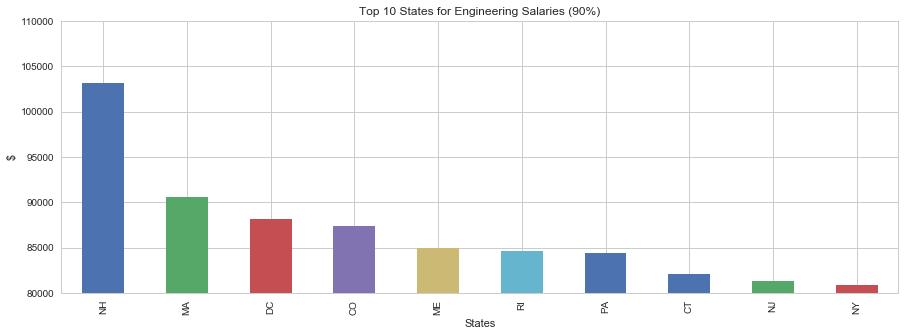

In [202]:
x1.plot.bar(x='STABBR', figsize=(15, 5))
plt.ylim([80000, 110000])
plt.xlabel('States')
plt.ylabel('$')
plt.title("Top 10 States for Engineering Salaries (90%)")

In [203]:

plot_usa_choropleth(eng_deg.groupby(['STABBR'])['PCT90_EARN_WNE_P8'].mean().sort_values(ascending = False), 'PCT90_EARN_WNE_P8', 'Engineering Salaries (90%)', 'Thousands USD')
plot_usa_choropleth(eng_deg.groupby(['STABBR'])['PCT75_EARN_WNE_P8'].mean().sort_values(ascending = False), 'PCT75_EARN_WNE_P8', 'Engineering Salaries (75%)', 'Thousands USD')
plot_usa_choropleth(eng_deg.groupby(['STABBR'])['PCT25_EARN_WNE_P8'].mean().sort_values(ascending = False), 'PCT25_EARN_WNE_P8', 'Engineering Salaries (25%)', 'Thousands USD')
plot_usa_choropleth(eng_deg.groupby(['STABBR'])['PCT10_EARN_WNE_P8'].mean().sort_values(ascending = False), 'PCT10_EARN_WNE_P8', 'Engineering Salaries (10%)', 'Thousands USD')


# Q3: University Expenses & Race
### How does the cost of the university impact the race demographics of the student body?

### Let's look at Private Universities vs. Public Universities

First, let's scan our data to look for anomolies....

In [204]:
data[['NPT4_PRIV','NPT4_PUB']].describe()


,NPT4_PRIV,NPT4_PUB
count,4076.000000,1895.000000
mean,18598.051276,9843.156728
std,7514.295474,4914.680807
min,881.000000,-3039.000000
25%,13562.500000,6360.500000
50%,18347.500000,8870.000000
75%,22817.000000,13076.500000
max,99047.000000,29806.000000


Private universities are more expenses than Public universities which is as expected.  One interesting item, is the minimum value is negative -$3,039, so the student would be making an income potentially to offset living expenses.

### Private Universities & Race

Private universities were split up by tritiles:  > $25k  |  $25k to $15k  |  < $15k

Private Universities where Total Expenses >= $25k

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,690.000000,690.000000,690.000000,690.000000
mean,0.499765,0.163232,0.054305,0.139958
std,0.237171,0.201833,0.071662,0.141801
min,0.000000,0.000000,0.000000,0.000000
25%,0.321975,0.041900,0.013025,0.054150
50%,0.529750,0.073000,0.030700,0.094000
75%,0.691850,0.188825,0.067075,0.165875
max,1.000000,0.965100,0.641000,0.973500


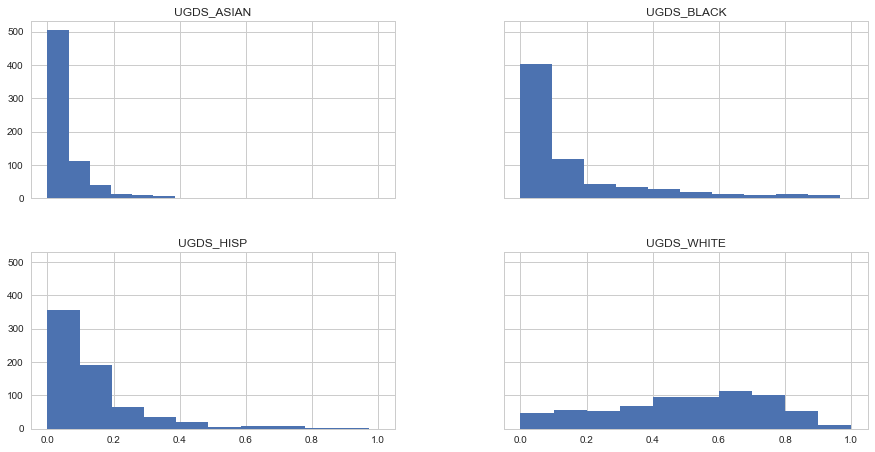

In [205]:
display(data[data['NPT4_PRIV'] >= 25000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].describe())
data[data['NPT4_PRIV'] >= 25000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].hist(figsize=(15, 7.5), sharex=True, sharey=True)
pass

Private University where total expenses is greater than $25k and less than $15k

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,2078.000000,2078.000000,2078.000000,2078.000000
mean,0.472545,0.220868,0.029074,0.172849
std,0.269824,0.227974,0.060485,0.207297
min,0.000000,0.000000,0.000000,0.000000
25%,0.234200,0.056000,0.004300,0.036150
50%,0.501700,0.133300,0.013150,0.087850
75%,0.699125,0.304500,0.029975,0.235800
max,1.000000,1.000000,1.000000,1.000000


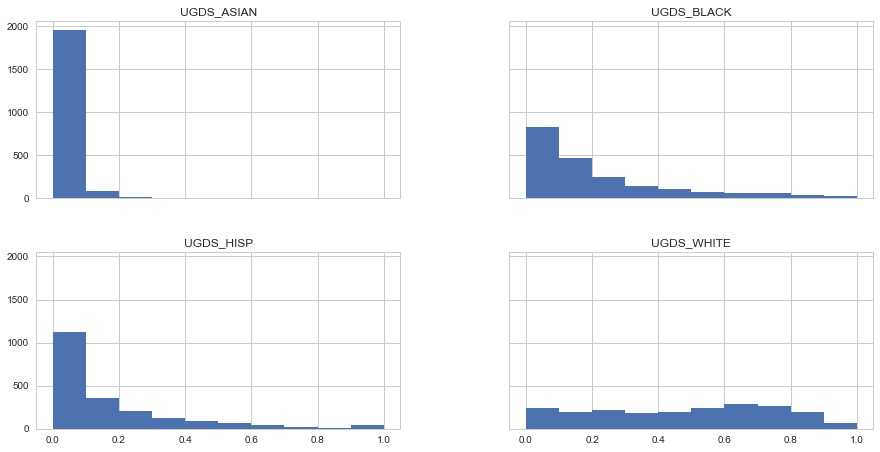

In [206]:
display(data[(data['NPT4_PRIV'] < 25000) & (data['NPT4_PRIV'] >= 15000)][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].describe())
data[(data['NPT4_PRIV'] < 25000) & (data['NPT4_PRIV'] >= 15000)][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].hist(figsize=(15, 7.5), sharex=True, sharey=True)
pass

Private University where total expenses is < $15k

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,1308.000000,1308.000000,1308.000000,1308.000000
mean,0.456857,0.193678,0.033255,0.248432
std,0.344660,0.257942,0.103261,0.329488
min,0.000000,0.000000,0.000000,0.000000
25%,0.091500,0.000650,0.000000,0.016900
50%,0.481400,0.083100,0.000000,0.083850
75%,0.762325,0.269200,0.023950,0.340200
max,1.000000,1.000000,1.000000,1.000000


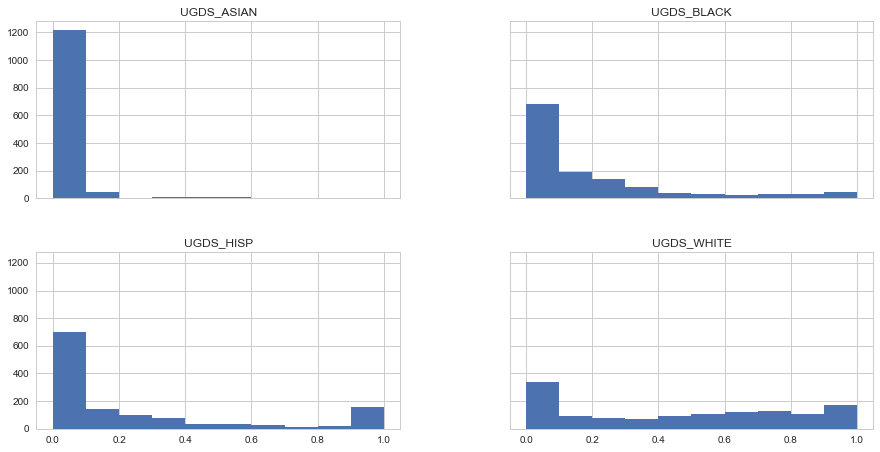

In [207]:
display(data[data['NPT4_PRIV'] < 15000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].describe())
data[data['NPT4_PRIV'] < 15000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].hist(figsize=(15, 7.5), sharex=True, sharey=True)
pass

Need to determine how all the races compare in a Private University as tuition increases.

In [208]:
display(data[data['NPT4_PRIV'] >= 25000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].mean())
display(data[(data['NPT4_PRIV'] < 25000) & (data['NPT4_PRIV'] >= 15000)][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].mean())
display(data[data['NPT4_PRIV'] < 15000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].mean())

UGDS_WHITE    0.499765
UGDS_BLACK    0.163232
UGDS_ASIAN    0.054305
UGDS_HISP     0.139958
dtype: float64

UGDS_WHITE    0.472545
UGDS_BLACK    0.220868
UGDS_ASIAN    0.029074
UGDS_HISP     0.172849
dtype: float64

UGDS_WHITE    0.456857
UGDS_BLACK    0.193678
UGDS_ASIAN    0.033255
UGDS_HISP     0.248432
dtype: float64

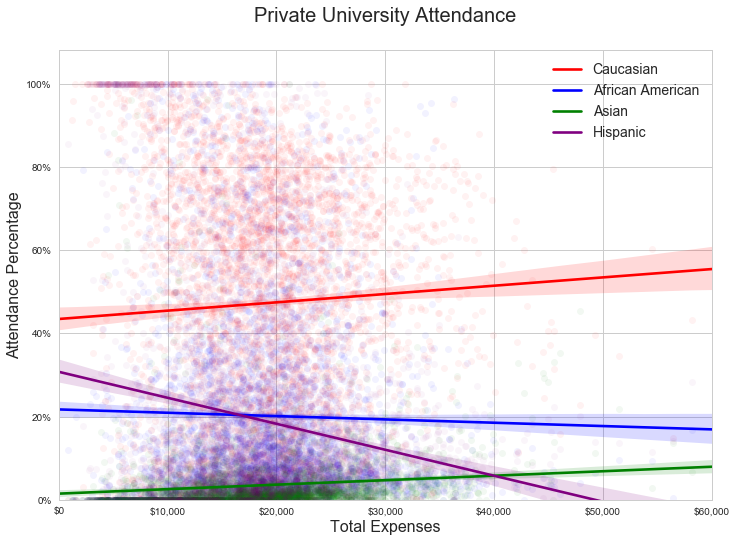

In [209]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('NPT4_PRIV','UGDS_WHITE', data, scatter_kws={'color': 'r', 'alpha': 0.05}, line_kws={'color': 'r'})
sns.regplot('NPT4_PRIV','UGDS_BLACK', data, scatter_kws={'color': 'b', 'alpha': 0.05}, line_kws={'color': 'b'})
sns.regplot('NPT4_PRIV','UGDS_ASIAN', data, scatter_kws={'color': 'g', 'alpha': 0.05}, line_kws={'color': 'g'})
sns.regplot('NPT4_PRIV','UGDS_HISP', data, scatter_kws={'color': 'purple', 'alpha': 0.04}, line_kws={'color': 'purple'})

plt.xlabel('Total Expenses', fontsize=16)
plt.ylabel('Attendance Percentage', fontsize=16)
plt.title('Private University Attendance', fontsize=20).set_position([.5, 1.05])
plt.legend(['Caucasian', 'African American', 'Asian', 'Hispanic'], fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
# plt.xticks(rotation=25)

plt.xlim(0, 60000)
plt.ylim(0, None)
pass

For private universities attendance percentage increases by ~15% for the Asians and the Caucasian population as the cost of the university increases while African Americans population declines by ~4%, and the Hispanic population declines by over 30%.

### Public Universities & Race
Public University where total expenses is >= $20k

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,60.000000,60.000000,60.00000,60.000000
mean,0.656985,0.139483,0.04092,0.080883
std,0.197361,0.179042,0.04215,0.070535
min,0.023200,0.009900,0.00000,0.000000
25%,0.575025,0.050625,0.01240,0.036450
50%,0.733350,0.080350,0.03065,0.062300
75%,0.784150,0.120850,0.04960,0.096950
max,0.884600,0.960000,0.25860,0.351700


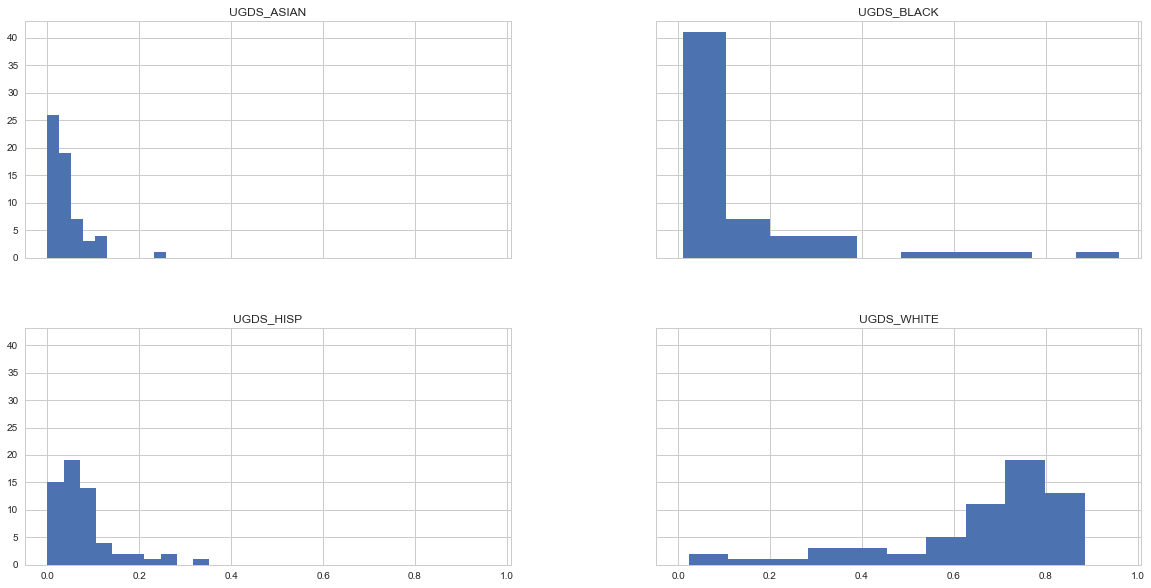

In [210]:
display(data[data['NPT4_PUB'] >= 20000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].describe())
data[data['NPT4_PUB'] >= 20000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].hist(figsize=(20, 10), sharex=True, sharey=True)
pass

Public Universities where total expenses is < $20k  and >= $10k

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,727.000000,727.000000,727.000000,727.000000
mean,0.620319,0.145573,0.036333,0.101396
std,0.234724,0.190075,0.055887,0.116351
min,0.000000,0.000000,0.000000,0.000000
25%,0.501650,0.035450,0.007750,0.030050
50%,0.674900,0.078200,0.016900,0.059700
75%,0.791250,0.168500,0.039000,0.123950
max,1.000000,0.942500,0.401700,0.784700


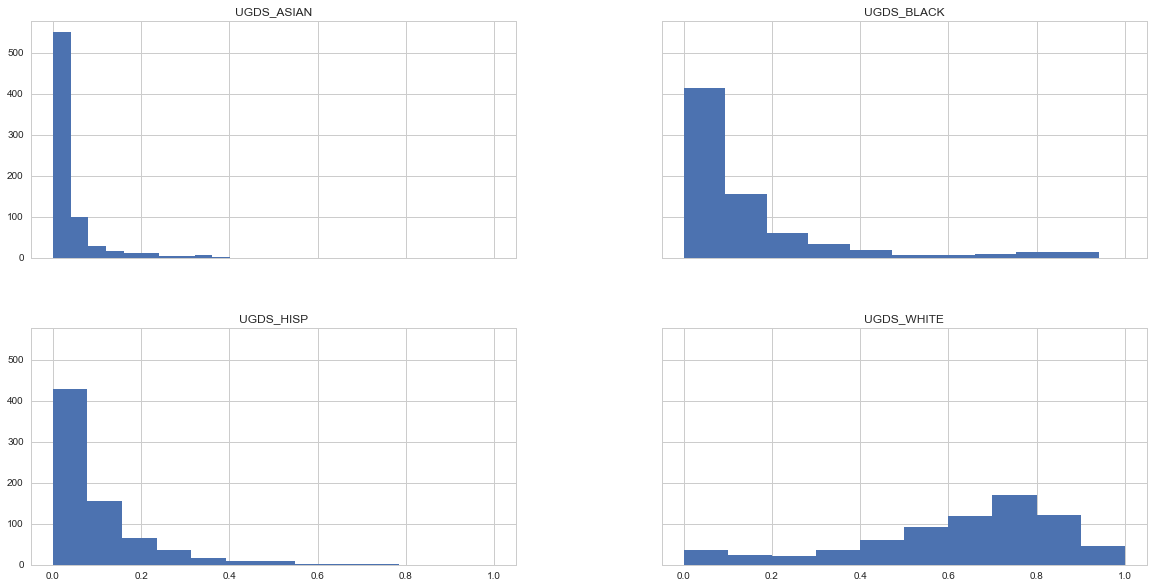

In [211]:
display(data[(data['NPT4_PUB'] < 20000) & (data['NPT4_PUB'] >= 10000)][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].describe())
data[(data['NPT4_PUB'] < 20000) & (data['NPT4_PUB'] >= 10000)][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].hist(figsize=(20, 10), sharex=True, sharey=True)
pass

Public University where total expenses is < $10k

,UGDS_WHITE,UGDS_BLACK,UGDS_ASIAN,UGDS_HISP
count,1108.000000,1108.000000,1108.000000,1108.000000
mean,0.531095,0.137044,0.035745,0.182897
std,0.266628,0.162665,0.062841,0.217675
min,0.000000,0.000000,0.000000,0.000000
25%,0.326800,0.028075,0.005500,0.033875
50%,0.571800,0.080300,0.013850,0.088550
75%,0.742400,0.182400,0.034925,0.258600
max,1.000000,0.936900,0.470700,1.000000


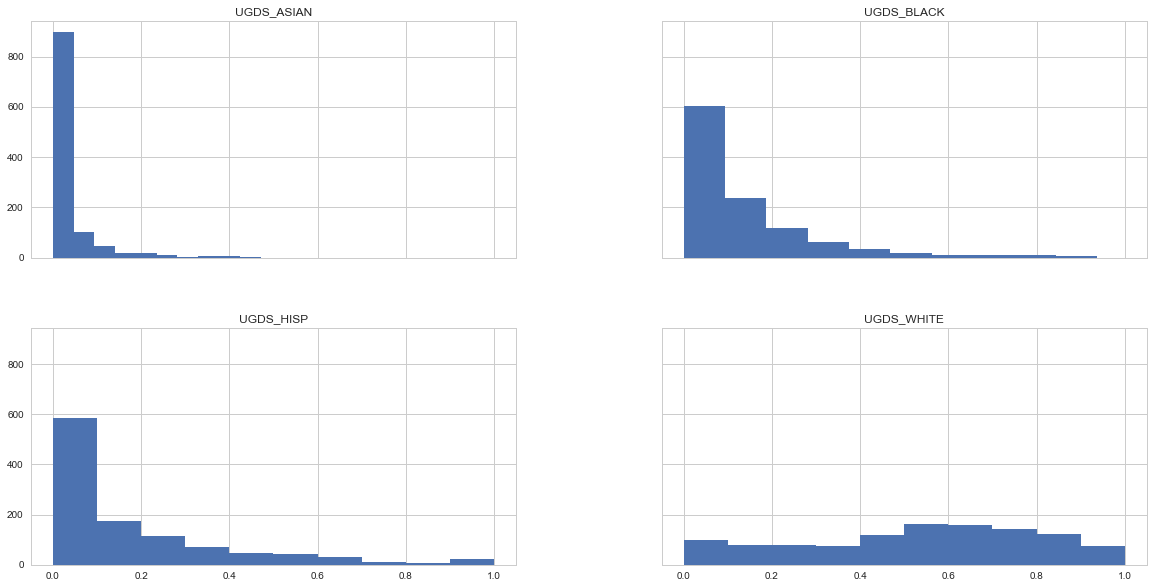

In [212]:
display(data[data['NPT4_PUB'] < 10000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].describe())
data[data['NPT4_PUB'] < 10000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].hist(figsize=(20, 10), stacked=True, sharex=True, sharey=True)
pass

Need to determine how all the races compare in a Public University as tuition increases.

In [213]:
display(data[data['NPT4_PUB'] >= 20000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].mean())
display(data[(data['NPT4_PUB'] < 20000) & (data['NPT4_PUB'] >= 10000)][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].mean())
display(data[data['NPT4_PUB'] < 10000][['UGDS_WHITE','UGDS_BLACK','UGDS_ASIAN','UGDS_HISP']].mean())

UGDS_WHITE    0.656985
UGDS_BLACK    0.139483
UGDS_ASIAN    0.040920
UGDS_HISP     0.080883
dtype: float64

UGDS_WHITE    0.620319
UGDS_BLACK    0.145573
UGDS_ASIAN    0.036333
UGDS_HISP     0.101396
dtype: float64

UGDS_WHITE    0.531095
UGDS_BLACK    0.137044
UGDS_ASIAN    0.035745
UGDS_HISP     0.182897
dtype: float64

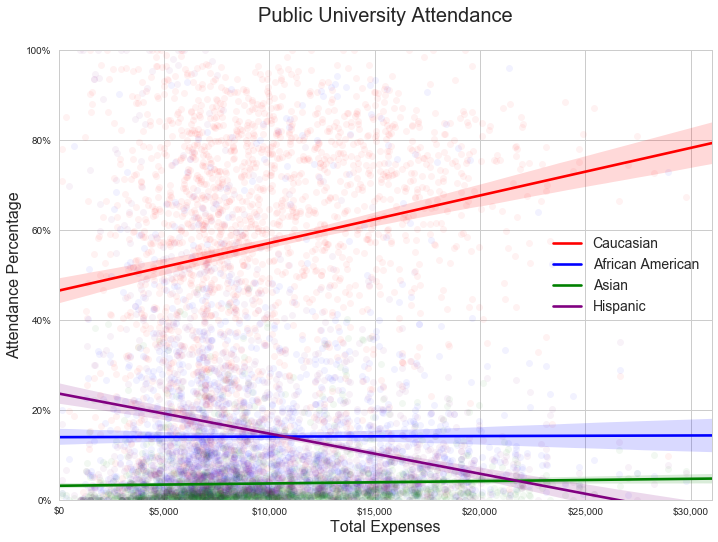

In [214]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('NPT4_PUB','UGDS_WHITE', data, scatter_kws={'color': 'r', 'alpha': 0.05}, line_kws={'color': 'r'})
sns.regplot('NPT4_PUB','UGDS_BLACK', data, scatter_kws={'color': 'b', 'alpha': 0.05}, line_kws={'color': 'b'})
sns.regplot('NPT4_PUB','UGDS_ASIAN', data, scatter_kws={'color': 'g', 'alpha': 0.05}, line_kws={'color': 'g'})
sns.regplot('NPT4_PUB','UGDS_HISP', data, scatter_kws={'color': 'purple', 'alpha': 0.05}, line_kws={'color': 'purple'})

plt.xlabel('Total Expenses', fontsize=16)
plt.ylabel('Attendance Percentage', fontsize=16)
plt.title('Public University Attendance', fontsize=20).set_position([.5, 1.05])
plt.legend(['Caucasian', 'African American', 'Asian', 'Hispanic'], fontsize=14)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.xlim(0, 31000)
plt.ylim(0, 1)

pass

# Q4: Faculty - Full-time and Part-time

### How does the faculty makeup (part-time vs. full time) impact student success and completion rate?

The variable, 'PFTFAC' is not in the dataset already. It turns out it exists in the complete set of data >100MB. We only need the index and the 'PFTFAC' variable, so let's only load those 2 columns, then merge it with the existing dataset.

NOTE:  This file is not checked in because of the size of the file. See the Data Section in the paper for more information.

In [215]:
faculty_df = pd.read_csv("https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv", usecols=['UNITID', 'PFTFAC'])

We have pulled in the field we need. Let's look at Graduation rate to see if there is a correlation with Full-time/Part-time Professors, let's explore the variable 'C150_4_POOLED_SUPP' == which is the graduation rate with optimizations.

Now that the field is cleaned up.  Let's merge our two datasets.

In [216]:
territories=('AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI')
states_data = data[~data['STABBR'].isin(territories)]

data_faculty_df = pd.merge(faculty_df, states_data)
data_faculty_df.set_index('UNITID')

,PFTFAC,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9,GT_28K_P10,GT_28K_P8,Employment_Freq
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,0.7354,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,...,20100,0.544,215,1480,33800,27500,0.58783781528472,0.567,0.483,0.893788
100663,0.8918,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,...,36500,0.722,347,2592,44500,38600,0.73726850748062,0.726,0.686,0.887022
100690,1.0000,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,33900,0.668,41,174,42400,30500,0.7356321811676,0.7,0.631,0.758929
100706,0.6374,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,28400,0.73,152,1106,50200,37700,0.78119349479675,0.755,0.71,0.873815
100724,0.6368,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,18000,0.468,297,1810,29400,20000,0.52983427047729,0.494,0.436,0.882466
100751,0.7378,105100,1051,The University of Alabama,Tuscaloosa,AL,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,0,3,...,37900,0.753,321,3536,47200,49300,0.77460408210754,0.765,0.722,0.903704
100760,0.4623,100700,1007,Central Alabama Community College,Alexander City,AL,www.cacc.edu,www.cacc.edu/NetPriceCalculator/14-15/npcalc.html,0,2,...,20200,0.469,151,689,29400,21800,0.52394777536392,0.494,0.463,0.808044
100812,0.4478,100800,1008,Athens State University,Athens,AL,www.athens.edu,https://24.athens.edu/apex/prod8/f?p=174:1:394...,0,3,...,24900,0.712,108,758,42100,24500,0.78364115953445,0.719,0.69,0.866209
100830,0.9585,831000,8310,Auburn University at Montgomery,Montgomery,AL,www.aum.edu,www.aum.edu/current-students/financial-informa...,0,3,...,28200,0.634,176,1182,35500,30300,0.6590524315834,0.62,0.615,0.865780


### Graduation Percentage

In [217]:
data_faculty_df[['C150_4_POOLED_SUPP']].describe()

,C150_4_POOLED_SUPP
count,2334
unique,1874
top,PrivacySuppressed
freq,139


We need to clean up this field.

In [218]:
data_faculty_df['C150_4_POOLED_SUPP'] = data_faculty_df['C150_4_POOLED_SUPP'].replace('PrivacySuppressed', np.nan)
data_faculty_df['C150_4_POOLED_SUPP'] = data_faculty_df['C150_4_POOLED_SUPP'].astype(float)

In [219]:
display(data_faculty_df[['C150_4_POOLED_SUPP']].describe())
display("\nMedian\n", data_faculty_df[['C150_4_POOLED_SUPP']].median())

,C150_4_POOLED_SUPP
count,2195.000000
mean,0.489597
std,0.206811
min,0.022700
25%,0.336850
50%,0.484600
75%,0.638400
max,1.000000


'\nMedian\n'

C150_4_POOLED_SUPP    0.4846
dtype: float64

In [220]:
# add new field back into degree dataframes.
bus_deg = data_faculty_df[data_faculty_df['PCIP52']>0]
lib_art = data_faculty_df[data_faculty_df['PCIP24']>0]
vis_art = data_faculty_df[data_faculty_df['PCIP50']>0]
eng_deg = data_faculty_df[data_faculty_df['PCIP14']>0]
math_deg = data_faculty_df[data_faculty_df['PCIP27']>0]

In [221]:
data_faculty_df[['C150_4_POOLED_SUPP']].median()

C150_4_POOLED_SUPP    0.4846
dtype: float64

In [222]:
top_states = data_faculty_df.groupby(['STABBR'])['C150_4_POOLED_SUPP'].mean().sort_values(ascending = False).head(10)
bottom_states = data_faculty_df.groupby(['STABBR'])['C150_4_POOLED_SUPP'].mean().sort_values(ascending = False).tail(10)

display("Top 10 States: Graduation Percentage\n", top_states)
display("\nBottom 10 States: Graduation Percentage\n", bottom_states)

'Top 10 States: Graduation Percentage\n'

STABBR
RI    0.699340
MA    0.619765
PA    0.585054
CT    0.582927
CA    0.575907
NH    0.571960
IA    0.556813
ME    0.540158
NJ    0.533308
MD    0.532780
Name: C150_4_POOLED_SUPP, dtype: float64

'\nBottom 10 States: Graduation Percentage\n'

STABBR
HI    0.401370
AL    0.387671
AR    0.378317
WY    0.373900
OK    0.367409
NM    0.362300
GA    0.357158
ND    0.355380
AK    0.302125
NV    0.251555
Name: C150_4_POOLED_SUPP, dtype: float64

### Full-time Faculty Percentages

Let's get some quick stats on the fields of interest: Full-time faculty percentage, Median earnings, Mean earnings, and Employment Frequency.

In [223]:
display(data_faculty_df['PFTFAC'].describe())
display("\nMedian: ", data_faculty_df['PFTFAC'].median())
data_faculty_df[['PFTFAC','MD_EARN_WNE_P10','MN_EARN_WNE_P10','Employment_Freq']].corr()

count    3647.000000
mean        0.580255
std         0.293502
min         0.000000
25%         0.333300
50%         0.555600
75%         0.862800
max         1.000000
Name: PFTFAC, dtype: float64

'\nMedian: '

0.5556

,PFTFAC,MD_EARN_WNE_P10,MN_EARN_WNE_P10,Employment_Freq
PFTFAC,1.000000,0.191857,0.193784,0.254636
MD_EARN_WNE_P10,0.191857,1.000000,0.981560,0.740366
MN_EARN_WNE_P10,0.193784,0.981560,1.000000,0.692742
Employment_Freq,0.254636,0.740366,0.692742,1.000000


The data quality is looking good, so let's proceed.

The percentage of full-time faculty have a very low correlation across earnings and employment frequency.

Let's take a quick look to see what percentage of faculty are full-time by State

In [224]:
top_states = data_faculty_df.groupby(['STABBR'])['PFTFAC'].mean().sort_values(ascending = False).head(10)
bottom_states = data_faculty_df.groupby(['STABBR'])['PFTFAC'].mean().sort_values(ascending = False).tail(10)

display("Top 10 States: Percentage of Full-time Professors\n", top_states)
display("\nBottom 10 States: Percentage of Full-time Professors\n", bottom_states)

'Top 10 States: Percentage of Full-time Professors\n'

STABBR
WY    0.853600
ND    0.812860
WA    0.786281
VT    0.747705
IA    0.727793
MS    0.718894
KY    0.718628
AR    0.717932
MT    0.717064
OK    0.691155
Name: PFTFAC, dtype: float64

'\nBottom 10 States: Percentage of Full-time Professors\n'

STABBR
IL    0.522826
CT    0.521380
OR    0.510898
NM    0.505979
UT    0.502079
MD    0.464923
NH    0.450239
DE    0.449229
CA    0.432014
AK    0.420683
Name: PFTFAC, dtype: float64

That's interesting to see the differences. Let's plot on the USA Map.

In [225]:
plot_usa_choropleth(data_faculty_df.groupby(['STABBR'])['PFTFAC'].mean().sort_values(ascending = False), 'PFTFAC', 'Percentage of Full-time Faculty', 'Percent')

### Add Employment Frequency
Let's now look at to see if there are strong correlations between Faculty full-time % and employment frequency.

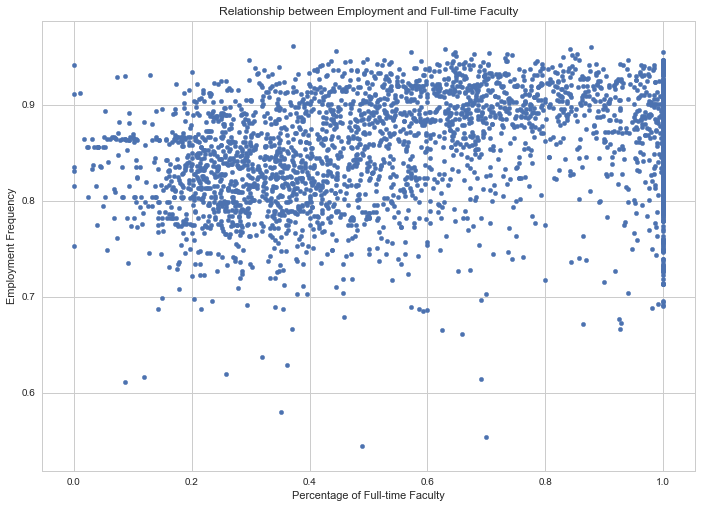

In [226]:
data_faculty_df.plot.scatter(x = 'PFTFAC', y = "Employment_Freq")
plt.xlabel('Percentage of Full-time Faculty')
plt.ylabel('Employment Frequency')
plt.title('Relationship between Employment and Full-time Faculty')
pass

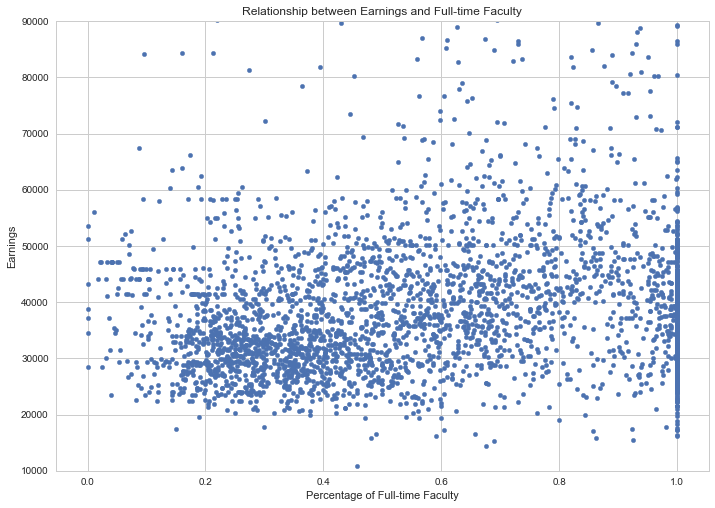

In [227]:
data_faculty_df.plot.scatter(x = 'PFTFAC', y = "MD_EARN_WNE_P10")
plt.xlabel('Percentage of Full-time Faculty')
plt.ylabel('Earnings')
plt.title('Relationship between Earnings and Full-time Faculty')
plt.ylim(10000, 90000)
pass

There seems to be a very low correlation between Faculty and the other variables looking at the scatter plots.

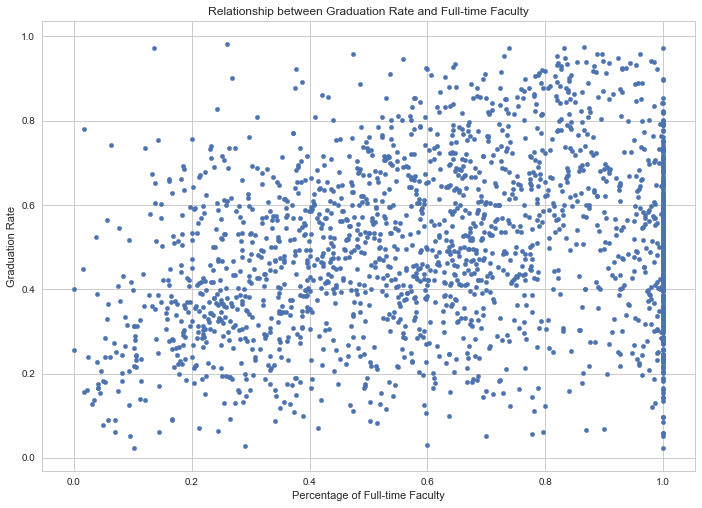

In [228]:
data_faculty_df.plot.scatter(x = 'PFTFAC', y = "C150_4_POOLED_SUPP")
plt.xlabel('Percentage of Full-time Faculty')
plt.ylabel('Graduation Rate')
plt.title('Relationship between Graduation Rate and Full-time Faculty')
pass

Let's add a regression line to help visually.

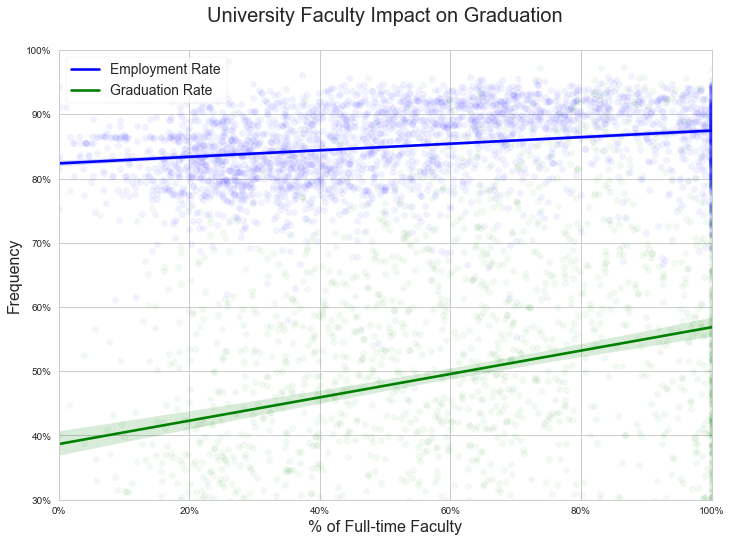

In [229]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('PFTFAC','Employment_Freq', data_faculty_df, scatter_kws={'color': 'blue', 'alpha': 0.05}, line_kws={'color': 'blue'})
sns.regplot('PFTFAC','C150_4_POOLED_SUPP', data_faculty_df, scatter_kws={'color': 'green', 'alpha': 0.05}, line_kws={'color': 'green'})

plt.xlabel('% of Full-time Faculty', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('University Faculty Impact on Graduation', fontsize=20).set_position([.5, 1.05])
plt.legend(['Employment Rate', 'Graduation Rate'], fontsize=14, frameon=True)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))

plt.xlim(0, 1)
plt.ylim(.3, 1)
pass

### Add Degrees  (% Faculty, % Graduated, % Employment Frequency)

In [230]:
a = data_faculty_df[['PFTFAC', 'C150_4_POOLED_SUPP','Employment_Freq']].corr()
b = eng_deg[['PFTFAC', 'C150_4_POOLED_SUPP','Employment_Freq']].corr()
c = bus_deg[['PFTFAC', 'C150_4_POOLED_SUPP','Employment_Freq']].corr()
d = lib_art[['PFTFAC', 'C150_4_POOLED_SUPP','Employment_Freq']].corr()
e = vis_art[['PFTFAC', 'C150_4_POOLED_SUPP','Employment_Freq']].corr()

display("All degrees\n", a)
display("\nEngineering degrees\n", b)
display("\nBusiness degrees\n", c)
display("\Liberal Arts degrees\n", d)
display("\nVisual Arts degrees\n", e)

'All degrees\n'

,PFTFAC,C150_4_POOLED_SUPP,Employment_Freq
PFTFAC,1.000000,0.252410,0.254636
C150_4_POOLED_SUPP,0.252410,1.000000,0.466726
Employment_Freq,0.254636,0.466726,1.000000


'\nEngineering degrees\n'

,PFTFAC,C150_4_POOLED_SUPP,Employment_Freq
PFTFAC,1.000000,0.208952,0.354756
C150_4_POOLED_SUPP,0.208952,1.000000,0.504522
Employment_Freq,0.354756,0.504522,1.000000


'\nBusiness degrees\n'

,PFTFAC,C150_4_POOLED_SUPP,Employment_Freq
PFTFAC,1.000000,0.27352,0.257926
C150_4_POOLED_SUPP,0.273520,1.00000,0.515860
Employment_Freq,0.257926,0.51586,1.000000


'\\Liberal Arts degrees\n'

,PFTFAC,C150_4_POOLED_SUPP,Employment_Freq
PFTFAC,1.000000,0.173264,0.195661
C150_4_POOLED_SUPP,0.173264,1.000000,0.506596
Employment_Freq,0.195661,0.506596,1.000000


'\nVisual Arts degrees\n'

,PFTFAC,C150_4_POOLED_SUPP,Employment_Freq
PFTFAC,1.000000,0.197039,0.296000
C150_4_POOLED_SUPP,0.197039,1.000000,0.489072
Employment_Freq,0.296000,0.489072,1.000000


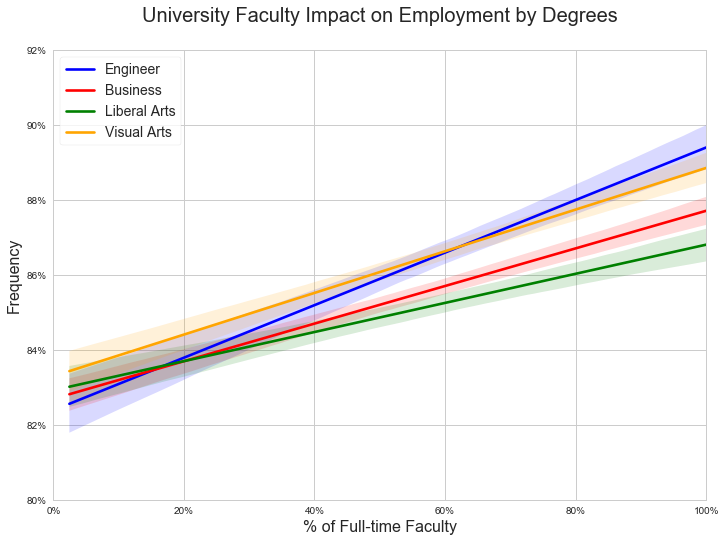

In [231]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('PFTFAC','Employment_Freq', eng_deg, scatter_kws={'color': 'blue', 'alpha': 0}, line_kws={'color': 'blue'})
sns.regplot('PFTFAC','Employment_Freq', bus_deg, scatter_kws={'color': 'red', 'alpha': 0}, line_kws={'color': 'red'})
sns.regplot('PFTFAC','Employment_Freq', lib_art, scatter_kws={'color': 'green', 'alpha': 0}, line_kws={'color': 'green'})
sns.regplot('PFTFAC','Employment_Freq', vis_art, scatter_kws={'color': 'orange', 'alpha': 0}, line_kws={'color': 'orange'})

plt.xlabel('% of Full-time Faculty', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('University Faculty Impact on Employment by Degrees', fontsize=20).set_position([.5, 1.05])
plt.legend(['Engineer', 'Business', 'Liberal Arts', 'Visual Arts'], fontsize=14, frameon=True)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))

plt.xlim(0, 1)
plt.ylim(.8, .92)
pass

In [232]:
eng_deg['PFTFAC'].describe()

count    915.000000
mean       0.627067
std        0.266296
min        0.071400
25%        0.395300
50%        0.638300
75%        0.866800
max        1.000000
Name: PFTFAC, dtype: float64

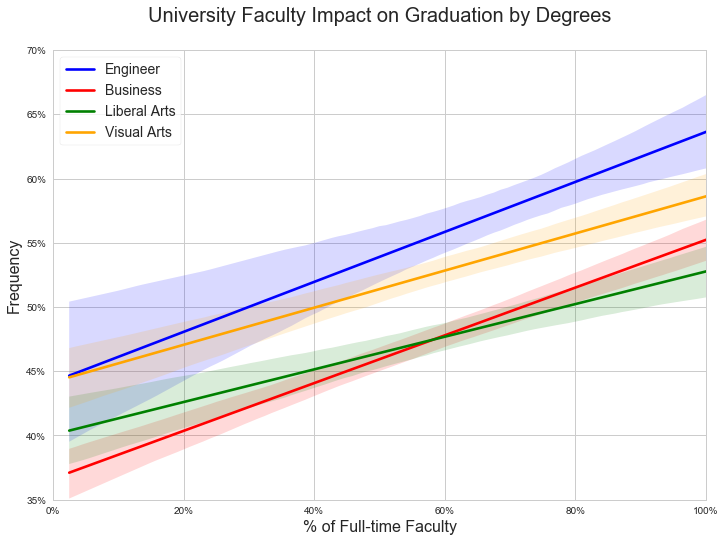

In [233]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.set(style = 'whitegrid')
sns.regplot('PFTFAC','C150_4_POOLED_SUPP', eng_deg, scatter_kws={'color': 'blue', 'alpha': 0}, line_kws={'color': 'blue'})
sns.regplot('PFTFAC','C150_4_POOLED_SUPP', bus_deg, scatter_kws={'color': 'red', 'alpha': 0}, line_kws={'color': 'red'})
sns.regplot('PFTFAC','C150_4_POOLED_SUPP', lib_art, scatter_kws={'color': 'green', 'alpha': 0}, line_kws={'color': 'green'})
sns.regplot('PFTFAC','C150_4_POOLED_SUPP', vis_art, scatter_kws={'color': 'orange', 'alpha': 0}, line_kws={'color': 'orange'})

plt.xlabel('% of Full-time Faculty', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('University Faculty Impact on Graduation by Degrees', fontsize=20).set_position([.5, 1.05])
plt.legend(['Engineer', 'Business', 'Liberal Arts', 'Visual Arts'], fontsize=14, frameon=True)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:00.0%}'))

plt.xlim(0, 1)
plt.ylim(.35, .7)
pass

# Q5: Geographical Analysis
### What is the geographical distribution of successful students?

Next, we examine the geographical distribution of student success factors of the entire dataset.  

For this analysis we remove the territories from the dataset because the territories are very different economy systems and behave as outliers.

What we see is that we have patches of areas that have considerably higher mean earnings. Specifically the Northeast, Northwest, Southwest and West North Central 


In [234]:
territories=('AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI')
states_data = data[~data['STABBR'].isin(territories)]


geo_salary = states_data.groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False)


plot_usa_choropleth(geo_salary, 'MD_EARN_WNE_P10', 'Mean earnings full distribution', 'Earnings')
display(geo_salary.to_frame().describe())




,MD_EARN_WNE_P10
count,50.000000
mean,34685.986844
std,3948.855150
min,27500.000000
25%,31685.964452
50%,33742.083333
75%,37105.493973
max,45482.517483


Where this picture gets more clear if we use only the top quartile (above $37k). The geographical distribution now becomes slightly different:



In [235]:


geo_salary = states_data[states_data['MD_EARN_WNE_P10'] > 37000].groupby(['STABBR'])['MD_EARN_WNE_P10'].mean().sort_values(ascending = False)

plot_usa_choropleth(geo_salary, 'MD_EARN_WNE_P10', 'Mean earnings distribution - Top quartile', 'Earnings')
display(geo_salary.to_frame().describe())


,MD_EARN_WNE_P10
count,50.000000
mean,47407.657479
std,3940.654517
min,41400.000000
25%,44715.000000
50%,46880.793651
75%,50062.525938
max,56447.674419


It is very surprising to see Oklahoma becoming home for some of the top paid students, although on average this was not the case.
Let’s add in this story the geographical dimension of debt, again using the entire dataset, excluding the territories. 


In [236]:

geo_debt = states_data.groupby(['STABBR'])['GRAD_DEBT_MDN_SUPP'].mean().sort_values(ascending = False)

display(geo_debt.describe())
plot_usa_choropleth(geo_debt, 'GRAD_DEBT_MDN_SUPP', 'Mean debt full distribution', 'Debt')

geo_debt = states_data[states_data['GRAD_DEBT_MDN_SUPP']>10819.181818].groupby(['STABBR'])['GRAD_DEBT_MDN_SUPP'].mean().sort_values(ascending = False)
plot_usa_choropleth(geo_debt, 'GRAD_DEBT_MDN_SUPP', 'Mean debt distribution - lower quartile', 'Debt')


count       50.000000
mean     16567.340876
std       2071.231768
min      10819.181818
25%      15119.963345
50%      16544.908790
75%      18016.462644
max      21214.690476
Name: GRAD_DEBT_MDN_SUPP, dtype: float64

What we observe in this geographical distribution is that the debt has almost the inverted geographical distribution, compared to the top earnings distribution. We can clearly see the patches that had the least earnings being now in the most debt. An interesting exception to this pattern is Wyoming.

We will add the last dimension to this story, the employment frequency:


In [237]:

geo_emp = states_data[states_data['Employment_Freq']>0.853111].groupby(['STABBR'])['Employment_Freq'].mean().sort_values(ascending = False)

display(geo_emp.describe())

plot_usa_choropleth(geo_emp, 'Employment_Freq', 'Employment full distribution', 'Employment')


count    49.000000
mean      0.891844
std       0.014607
min       0.864080
25%       0.882416
50%       0.891962
75%       0.902086
max       0.925270
Name: Employment_Freq, dtype: float64

The areas with the most employment are the West North Central states, Minneapolis and the Northeast coast



We want to answer the question, where are the most successful students. To answer this question, we bring all three dimensions together, earnings, debt and employment. We want to see what is the geographical distribution of the union of the students with the least debt (lower than \$15k) and the most employment frequency (more than 85%) and the most earnings ($37k):


In [238]:

geo_emp = states_data[(states_data['Employment_Freq']> 0.85) & (states_data['MD_EARN_WNE_P10'] > 37000) & (states_data['GRAD_DEBT_MDN_SUPP'] < 15000)].groupby(['STABBR']).count()

display(geo_emp.head())

plot_usa_choropleth(geo_emp['UNITID'], 'UNITID', 'Distribution of successful students', 'Count')


,UNITID,OPEID,OPEID6,INSTNM,CITY,INSTURL,NPCURL,HCM2,PREDDEG,HIGHDEG,...,SD_EARN_WNE_P8,GT_25K_P8,COUNT_NWNE_P9,COUNT_WNE_P9,MN_EARN_WNE_P9,SD_EARN_WNE_P9,GT_25K_P9,GT_28K_P10,GT_28K_P8,Employment_Freq
STABBR,,,,,,,,,,,,,,,,,,,,,
AR,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
AZ,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CA,20,20,20,20,20,20,14,20,20,20,...,20,20,20,20,20,20,20,20,20,20
CO,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CT,8,8,8,8,8,8,5,8,8,8,...,8,8,8,8,8,8,8,8,8,8
